# Inicio
Projeto Final da disciplina Introdução à ciência de dados (X500)

Aluno: Matheus Linhares Ferreira Gomes

Matrícula: 2225883




Tendo em mãos o dataset dos Tweets de @LulaOficial e @jairbolsonaro responder a pergunta:

**Será que é possível descrever a ideologia política através de dados?**

**Sobre o Dataset**


Os dados serão fornecidos por 2 arquivos, jairbolsonaro.json e lulaoficial.json.
Cada arquico contem informações dos tweets feitos por @jairbolsonaro e @LulaOficial.

**Abordagem**

Inicialmente, será feito um estudo individual de cada usuário apresentando algumas contagens.

    1.1 Séries temporais dos número de publicações, rettwitters, favoritações.

    1.2 Expressar os marcos temporais (em gráficos).

        1.2.1 Eleições 2018;

        1.2.2 Impeachment Dilma;

        1.2.3 Copa do mundo.

    1.3 Será calculado as palavras mais frequentes expressas por cada usuário.

        1.3.1 stopWords

        1.3.2 Definir tokens.

        1.3.3 Fazer refinamentos e retirar pontuações.

        1.3.4 Apresentar resultados em gráficos de barras e word Clouds.

2. Comparação entre as publicações dos dois usuários.

        2.1 Quantidade de Favortites
        2.2 Quantidade de Retweets
        2.3 Relação de Curtida/Retweet

3. Predição de Ideologia

    3.1 Utilizando um dataset com definições de ideologias de Direita e Esquerda, será utilizado os métodos Regressão Logistica, Arvore de Decisão e SVM para predizer o pensamento político de Lula e Bolsonaro.

    3.2 Será utilizando também pelo método de Arvore de Decisão e SVM, a predição dos dados utilizando Trigramas.



**Importação dos arquivos e tramento dos dados**


Incialmente serão importados os arquivos e as bibliotecas utilizadas.

## Bibliotecas Utilizadas

In [ ]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import spacy.cli
spacy.cli.download("pt_core_news_sm")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
import pt_core_news_sm
spc_pt = pt_core_news_sm.load()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
pln = spacy.load('pt_core_news_sm')

drive.mount('/content/drive')

%matplotlib inline

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
Mounted at /content/drive


## Importar Datasets

In [ ]:
# LER DATASETS
dfb = pd.read_json('/content/drive/MyDrive/DisciplinaIA/PROJETO/DADOS/Trigrama/jairbolsonaro.json')
dfl = pd.read_json('/content/drive/MyDrive/DisciplinaIA/PROJETO/DADOS/Trigrama/LulaOficial.json')
dfl['label'] = 1
dfb['label'] = 2

In [ ]:
dfTesq = pd.read_excel('/content/drive/MyDrive/DisciplinaIA/PROJETO/DADOS/NLP1/esquerda.xlsx')
dfTdir= pd.read_excel('/content/drive/MyDrive/DisciplinaIA/PROJETO/DADOS/NLP1/direita.xlsx')
dfTesq['label'] = 1
dfTdir['label'] = 2
dfti = pd.concat([dfTesq, dfTdir])
dfti = dfti.reset_index(drop=True)
dfti

,texto,label
0,A ideologia de esquerda é um conjunto complexo...,1
1,Essa corrente de pensamento busca transformar ...,1
2,No cerne da ideologia de esquerda está o marxi...,1
3,O marxismo analisa a sociedade como sendo divi...,1
4,Essa exploração é vista como a base da desigua...,1
...,...,...
890,Combate à exploração infantil e ao trabalho es...,2
891,Respeito à diversidade religiosa e promoção do...,2
892,Defesa da liberdade de expressão e do direito ...,2
893,Proteção dos direitos dos idosos e promoção da...,2


In [ ]:
dfb.drop(['truncated', 'entities', 'source','in_reply_to_status_id','in_reply_to_status_id_str',
          'retweeted','lang','favorited','extended_entities','possibly_sensitive','quoted_status_id',
          'quoted_status_id_str','quoted_status_permalink','quoted_status','in_reply_to_user_id',
          'in_reply_to_user_id_str','in_reply_to_screen_name','user','geo','coordinates','place','contributors',
          'is_quote_status','id','id_str'],
          1, inplace = True)
dfl.drop(['truncated', 'entities', 'source','in_reply_to_status_id','in_reply_to_status_id_str',
          'retweeted','lang','favorited','extended_entities','possibly_sensitive','quoted_status_id',
          'quoted_status_id_str','quoted_status_permalink','quoted_status','in_reply_to_user_id',
          'in_reply_to_user_id_str','in_reply_to_screen_name','user','geo','coordinates','place','contributors',
          'is_quote_status','id','id_str'],
          1, inplace = True)

<ipython-input-5-1cdc7ee943ad>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dfb.drop(['truncated', 'entities', 'source','in_reply_to_status_id','in_reply_to_status_id_str',
<ipython-input-5-1cdc7ee943ad>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dfl.drop(['truncated', 'entities', 'source','in_reply_to_status_id','in_reply_to_status_id_str',


In [ ]:
dfb.head(3)

,created_at,full_text,display_text_range,retweet_count,favorite_count,label
0,2010-04-01 02:59:50+00:00,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...","[0, 137]",30,15,2
1,2019-01-10 11:02:23+00:00,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...","[0, 90]",1773,31618,2
2,2019-07-19 02:04:16+00:00,- Para descontrair. Proibido queimar ovo. (Kkk...,"[0, 48]",5859,46637,2


In [ ]:
dfl.head(3)

,created_at,full_text,display_text_range,retweet_count,favorite_count,label
0,2018-08-17 16:23:04+00:00,"""O presidente Lula vai dar um passeio nessa el...","[0, 212]",79,347,1
1,2014-09-16 01:53:02+00:00,@dilmabr afirma que aqueles que querem acabar ...,"[0, 139]",17,9,1
2,2017-08-08 23:23:49+00:00,O PT deu cidadania para as mulheres fazerem po...,"[0, 95]",72,203,1


In [ ]:
dfti

,texto,label
0,A ideologia de esquerda é um conjunto complexo...,1
1,Essa corrente de pensamento busca transformar ...,1
2,No cerne da ideologia de esquerda está o marxi...,1
3,O marxismo analisa a sociedade como sendo divi...,1
4,Essa exploração é vista como a base da desigua...,1
...,...,...
890,Combate à exploração infantil e ao trabalho es...,2
891,Respeito à diversidade religiosa e promoção do...,2
892,Defesa da liberdade de expressão e do direito ...,2
893,Proteção dos direitos dos idosos e promoção da...,2


# Pré-processamento do Texto

### Stopwords

In [ ]:
nltk.download('stopwords')
stopwords_pt = set(stopwords.words("portuguese"))
#stopwords_pt = stopwords_pt | {'de o', 'de a', 'o', 'R$','a o','🇧','🇷','em o','em a','por o','por a','👍','🏻','👍🏻','😉','🤔','🌍',
#                   'lula','brasileiro','bolsonaro','jair','/n','Brasil','lulapelobrasil','Lula','c/','p/','q','d','\n\n',
#                   'em este','pra','Ricardo','stuckert','👉','😂','🏻r','):','1','2','3','4','5','6','7','8','9','0','10',
#                   '11','12','🤖'}
sw2 = {'de o', 'de a', 'o', 'R$','a o','🇧','🇷','em o','em a','por o','por a','👍','🏻','👍🏻','😉','🤔','🌍',
                   'lula','brasileiro','bolsonaro','jair','/n','brasil','lulapelobrasil','Lula','c/','p/','q','d','\n\n',
                   'em este','pra','ricardo','stuckert','👉','😂','🏻r','):','1','2','3','4','5','6','7','8','9','0','10',
                   '11','12','13','🤖','http','https','tbt','t','co'}
for i in range(0,3000):
    sw2 = sw2 | {str(i)}
    sw2 = sw2 | {str(i)+'º'}
    sw2 = sw2 | {'0'+str(i)}
stopwords_pt = stopwords_pt | sw2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Processamento

In [ ]:
  def limpa_texto(texto):
    '''(str) -> str
    Essa funcao recebe uma string, deixa tudo em minusculo, filtra apenas letras,
    retira stopwords, lemmatiza e retorna a string resultante.
    '''
    texto = texto.lower()

    texto = re.sub(r"[\W\d_]+", " ", texto)

    texto = [pal for pal in texto.split() if pal not in stopwords_pt]

    spc_texto = spc_pt(" ".join(texto))
    tokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in spc_texto]

    return " ".join(tokens)

In [ ]:
pontuacoes="'\".,?/[]{}!%*&()-+=..."
tokensInvidos=['"','"',"","'"]
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding


def processamento(texto):
    texto=texto.lower()
    documento=pln(texto)
    lista1=[]
    for p in documento:
        l = p.lemma_.split(' ')
        for i in l:
            if len(i) >= 2:
                if not is_link(i):
                    lista1.append(i.lower().replace('\r', '').replace('\n', ''))

    lista2=[]
    for p in lista1:
        if (p in stopwords_pt)==False:
            lista2.append(p)

    lista3=[]
    for p in lista2:
        if (p in pontuacoes)==False:
            lista3.append(p)

    lista4=[]
    for p in lista3:
        if (p in tokensInvidos)==False:
            lista4.append(p)

    return lista4


def is_link(text):
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return bool(url_pattern.match(text))


def get_content_df(df):
    text=''
    #print(type(text))
    for p in df['full_text'].values:
        text=text+ ' '+p


    return processamento(text)

In [ ]:
dfb2 = pd.DataFrame()
dfb2['full_text'] = dfb['full_text'].apply(processamento)

In [ ]:
dfb2['label'] = dfb['label']
dfb2.head(5)

,full_text,label
0,"[ditadura, paredão, chico, alencar, valentão, ...",2
1,"[bom, dia, amigo, canguru, deixar, plano, fort...",2
2,"[descontrair, proibir, queimar, ovo, kkkk]",2
3,"[trecho, entrevista, vivo, jornal, nacional, 0...",2
4,"[querer, criar, fundão, bilionário, reforma, p...",2


In [ ]:
dfl2 = pd.DataFrame()
#dfl['full_text'] = dfl['full_text'].apply(limpa_texto)
dfl2['full_text'] = dfl['full_text'].apply(processamento)

In [ ]:
dfl2['label'] = dfl['label']
dfl2.head(5)

,full_text,label
0,"[presidente, ir, dar, passeio, eleição, ganhar...",1
1,"[@dilmabr, afirmar, querer, acabar, ministério...",1
2,"[pt, dar, cidadania, mulher, fazer, política, ...",1
3,"[continuar, lulinha, paz, amor, gente, poder, ...",1
4,"[olhar, último, pesquisa, ver, único, coisa, t...",1


In [ ]:
dfti['texto'] = dfti['texto'].apply(limpa_texto)
#dfti['texto'] = dfti['texto'].apply(processamento)
dfti

,texto,label
0,ideologia esquerdo conjunto complexo ideia pol...,1
1,corrente pensamento buscar transformar estrutu...,1
2,cerne ideologio esquerdo marxismo desenvolver ...,1
3,marxismo analisar sociedade ser divider classe...,1
4,exploração ver base desigualdade social econômico,1
...,...,...
890,combater exploração infantil trabalho escravo,2
891,respeito diversidade religioso promoção diálog...,2
892,defês liberdade Expressão direito privacidade,2
893,proteção direito idoso promoção qualidade vido...,2


In [ ]:
dfTesq['texto']=dfTesq['texto'].apply(processamento)
dfTdir['texto']=dfTdir['texto'].apply(processamento)

In [ ]:
dfTesq

,texto,label
0,"[ideologia, esquerda, conjunto, complexo, idei...",1
1,"[corrente, pensamento, buscar, transformar, es...",1
2,"[cerne, ideologia, esquerda, marxismo, desenvo...",1
3,"[marxismo, analisar, sociedade, divider, class...",1
4,"[exploração, ver, base, desigualdade, social, ...",1
...,...,...
444,"[promoção, igualdade, gênero, relação, familia...",1
445,"[lutar, valorização, proteção, direito, pessoa...",1
446,"[defesa, direito, liberdade, religião, crença]",1
447,"[combater, discriminação, violência, contra, p...",1


In [ ]:
dfb2['label']=2
dfl2['label']=1
dft2 = pd.DataFrame()
dft2 = pd.concat([dfb,dfl]).reset_index()
dft2

,index,created_at,full_text,display_text_range,retweet_count,favorite_count,label
0,0,2010-04-01 02:59:50+00:00,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...","[0, 137]",30,15,2
1,1,2019-01-10 11:02:23+00:00,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...","[0, 90]",1773,31618,2
2,2,2019-07-19 02:04:16+00:00,- Para descontrair. Proibido queimar ovo. (Kkk...,"[0, 48]",5859,46637,2
3,3,2018-10-09 02:52:56+00:00,Trecho de entrevista ao vivo para o Jornal Nac...,"[0, 65]",13915,56322,2
4,4,2017-08-23 15:12:48+00:00,Querem criar o fundão bilionário na Reforma Po...,"[0, 138]",2271,7147,2
...,...,...,...,...,...,...,...
21750,14956,2014-10-23 13:51:38+00:00,O prefeito Eduardo Paes e @LindbergFarias acom...,"[0, 99]",19,8,1
21751,14957,2018-10-02 13:23:07+00:00,"Haddad, o candidato de Lula, com Lindberg sena...","[0, 140]",52,191,1
21752,14958,2016-07-24 15:04:25+00:00,"Nádia Campeão: ""não vamos permitir que essa ca...","[0, 123]",5,12,1
21753,14959,2019-06-11 15:31:21+00:00,"Os advogados de Lula, Cristiano Zanin e José R...","[0, 232]",263,1191,1


In [ ]:
dfb['full_text'] = dfb['full_text'].apply(limpa_texto)
dfl['full_text'] = dfl['full_text'].apply(limpa_texto)

### Feature extration com TF-IDF

In [ ]:
txti = dfti['texto']

# Instanciando o TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=5000)

# Vetorizando
X_tfidf = tfidf_vect.fit_transform(txti)

In [ ]:
#print(X_tfidf_lb)
print(X_tfidf)

  (0, 739)	0.24761491483620615
  (0, 325)	0.3122234182763785
  (0, 267)	0.3122234182763785
  (0, 815)	0.2561120444933043
  (0, 517)	0.23138201734632238
  (0, 446)	0.1591992893330458
  (0, 866)	0.2098213630959915
  (0, 100)	0.25167009604968754
  (0, 811)	0.33218626835301474
  (0, 662)	0.1792760062965651
  (0, 439)	0.2727349457968002
  (0, 146)	0.3122234182763785
  (0, 159)	0.27991916655629234
  (0, 342)	0.24043069407671405
  (0, 442)	0.20338284118511218
  (1, 470)	0.28334521949503494
  (1, 448)	0.30247328125849143
  (1, 814)	0.2074190123372158
  (1, 185)	0.3351729188247884
  (1, 880)	0.3351729188247884
  (1, 369)	0.3351729188247884
  (1, 283)	0.19881788259898445
  (1, 354)	0.30247328125849143
  (1, 850)	0.3351729188247884
  (1, 106)	0.2433734303535449
  :	:
  (890, 373)	0.45232294348372326
  (891, 497)	0.46228996826392915
  (891, 273)	0.4359074338498009
  (891, 753)	0.6185844888204504
  (891, 765)	0.2839508095821498
  (891, 269)	0.3092922444102252
  (891, 710)	0.19322569661689928
  (892

In [ ]:
def mostra_metricas(y_true, y_pred):
  ''' Função que recebe o y real, o y predito e mostra as
  principais metricas.
  '''
  print("Acurácia: ", accuracy_score(y_true, y_pred))
  print("\nAUROC:", roc_auc_score(y_true, y_pred))
  print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))
  print("\nMatriz de confusão:")
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
  plt.show()

## Importar Datasets

In [ ]:
df_bolsonaro = pd.read_json('/content/drive/MyDrive/DisciplinaIA/PROJETO/DADOS/Trigrama/jairbolsonaro.json')
df_lula = pd.read_json('/content/drive/MyDrive/DisciplinaIA/PROJETO/DADOS/Trigrama/LulaOficial.json')

bolsonaro_dates = df_bolsonaro['created_at']
bolsonaro_retweets = df_bolsonaro['retweet_count']
bolsonaro_favorites = df_bolsonaro['favorite_count']
bolsonaro_text = df_bolsonaro['full_text']

lula_dates = df_lula['created_at']
lula_retweets = df_lula['retweet_count']
lula_favorites = df_lula['favorite_count']
lula_text = df_lula['full_text']

In [ ]:
bolsonaro_daily_counts = df_bolsonaro.groupby(pd.Grouper(key='created_at', freq='D')).size()
lula_daily_counts = df_lula.groupby(pd.Grouper(key='created_at', freq='D')).size()

bolsonaro_time_series = pd.DataFrame({'Dates': bolsonaro_dates, 'Retweets': bolsonaro_retweets, 'Favorites': bolsonaro_favorites})
bolsonaro_time_series.set_index('Dates', inplace=True)

lula_time_series = pd.DataFrame({'Dates': lula_dates, 'Retweets': lula_retweets, 'Favorites': lula_favorites})
lula_time_series.set_index('Dates', inplace=True)

In [ ]:
bolsonaro_max_retweets_per_day = df_bolsonaro.groupby('created_at')['retweet_count'].max()
bolsonaro_max_favorites_per_day = df_lula.groupby('created_at')['favorite_count'].max()

max_retweets_bolsonaro = bolsonaro_max_retweets_per_day.max()
max_favorites_bolsonaro = bolsonaro_max_favorites_per_day.max()

print("Quantidade máxima de retweets em um único dia para Bolsonaro:", max_retweets_bolsonaro)
print("Quantidade máxima de favoritos em um único dia para Bolsonaro:", max_favorites_bolsonaro)


Quantidade máxima de retweets em um único dia para Bolsonaro: 47448
Quantidade máxima de favoritos em um único dia para Bolsonaro: 352535


In [ ]:
df_bolsonaro['created_at'].sort_values(ascending=False).reset_index()

,index,created_at
0,674,2020-01-08 21:57:59+00:00
1,5971,2020-01-08 20:24:41+00:00
2,4397,2020-01-08 15:27:40+00:00
3,1444,2020-01-08 15:27:40+00:00
4,2920,2020-01-08 15:27:39+00:00
...,...,...
6789,156,2010-04-01 02:02:37+00:00
6790,81,2010-04-01 01:46:16+00:00
6791,5022,2010-04-01 01:43:59+00:00
6792,2950,2010-04-01 01:35:34+00:00


In [ ]:
tp_inic = df_bolsonaro['created_at'].sort_values(ascending=True).reset_index()
tp_final = df_bolsonaro['created_at'].sort_values(ascending=False).reset_index()
tp_inic['created_at'][0]

Timestamp('2010-04-01 01:33:17+0000', tz='UTC')

In [ ]:
tp_final['created_at'][0]

Timestamp('2020-01-08 21:57:59+0000', tz='UTC')

## 1. Séries Temporais

### Curtidas e Retweets de Bolsonaro

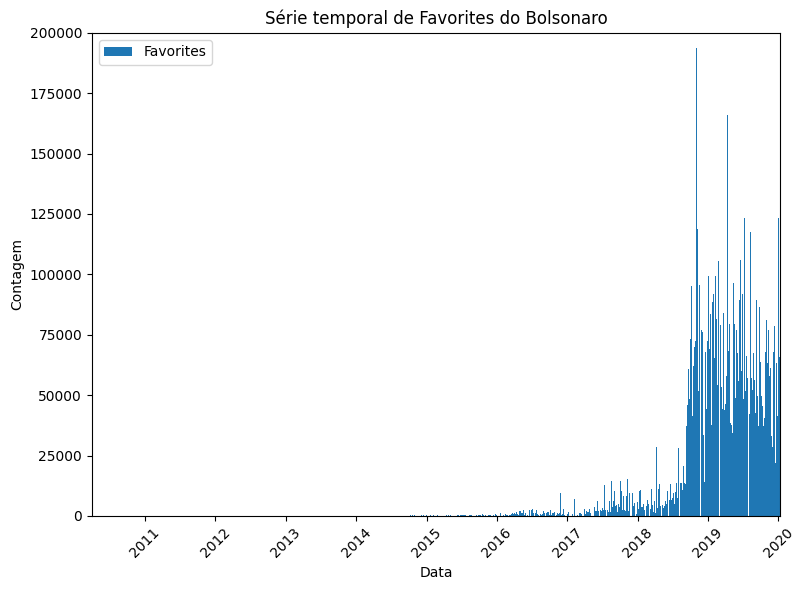

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(bolsonaro_dates, bolsonaro_favorites, linestyle='', label='Favorites')
plt.title('Série temporal de Favorites do Bolsonaro')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=200000)  # Define limite inferior como 0 e limite superior como o valor máximo entre retweets e favoritações
plt.tight_layout()
plt.xlim(tp_inic['created_at'][0],tp_final['created_at'][0])
plt.show()

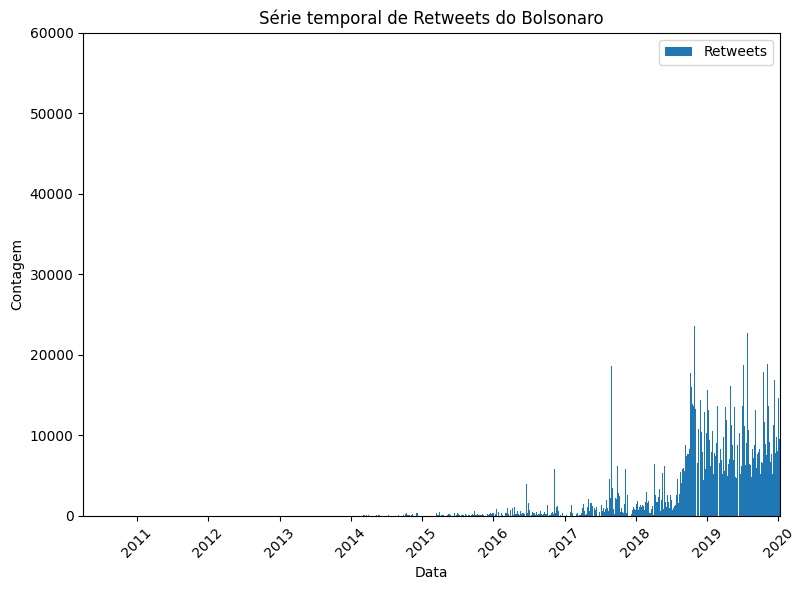

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(bolsonaro_dates, bolsonaro_retweets, linestyle='', label='Retweets')
plt.title('Série temporal de Retweets do Bolsonaro')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=60000)  # Define limite inferior como 0 e limite superior como o valor máximo entre retweets e favoritações
plt.tight_layout()
plt.xlim(tp_inic['created_at'][0],tp_final['created_at'][0])
plt.show()

In [ ]:
np.mean(lula_retweets)

282.2200387674621

### Curtidas e Retweets de Lula

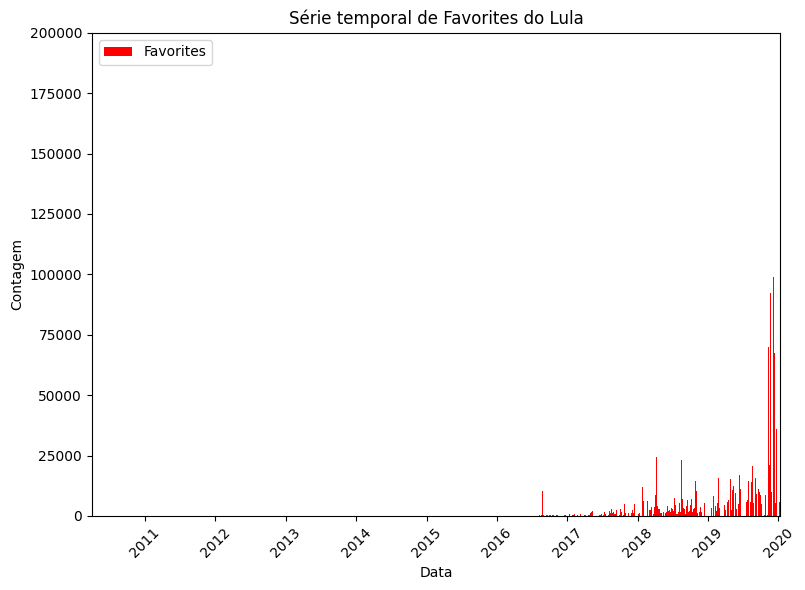

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(lula_dates, lula_favorites,linestyle='', label='Favorites',color='red')
plt.title('Série temporal de Favorites do Lula')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=200000)  # Define limite inferior como 0 e limite superior como o valor máximo entre retweets e favoritações
plt.tight_layout()
plt.xlim(tp_inic['created_at'][0],tp_final['created_at'][0])
plt.show()

In [ ]:
np.mean(lula_favorites)

1040.2791925673419

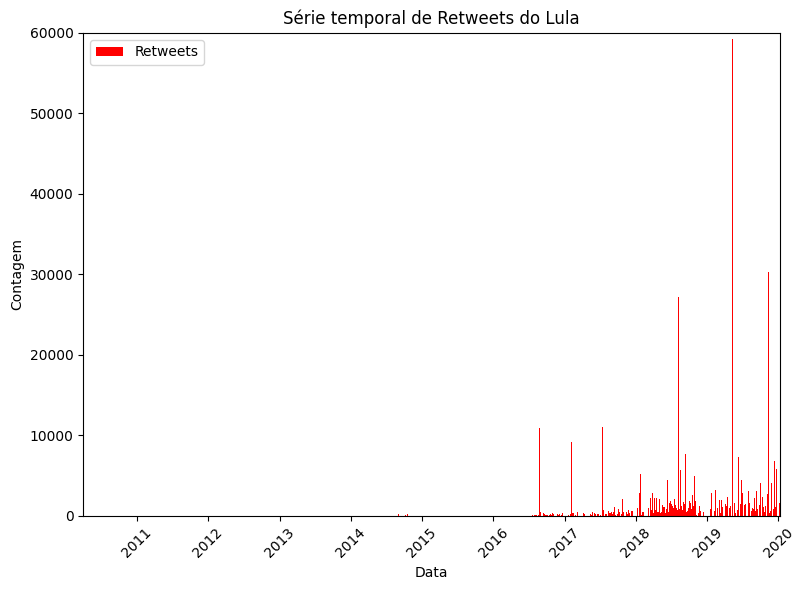

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(lula_dates, lula_retweets,linestyle='', label='Retweets',color='red')
plt.title('Série temporal de Retweets do Lula')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=60000)  # Define limite inferior como 0 e limite superior como o valor máximo entre retweets e favoritações
plt.tight_layout()
plt.xlim(tp_inic['created_at'][0],tp_final['created_at'][0])
plt.show()

In [ ]:
np.mean(lula_retweets)

282.2200387674621

In [ ]:
print('Média de Favorites ------------')
print('Bolsonaro:',np.mean(bolsonaro_favorites))
print('Lula:',np.mean(lula_favorites))
print('Média de Retweets  ------------')
print('Bolsonaro:',np.mean(bolsonaro_retweets))
print('Lula:',np.mean(lula_retweets))

Média de Favorites ------------
Bolsonaro: 17259.234030026495
Lula: 1040.2791925673419
Média de Retweets  ------------
Bolsonaro: 2832.191934059464
Lula: 282.2200387674621


Baseado nos gráficos acima, pode-se notar que a quantidade de Favorites e Tweets de Bolsonaro são bem maiores que os de Lula. A relação chega ser de até 10 vezes mais para a Média de Retweets e mais que isso para a de Favorites.

Isso mostra que o público de @jairbolsonaro é mais engajado com suas publicações.

### Relação de Curtida/Retweet

5.601258692807146


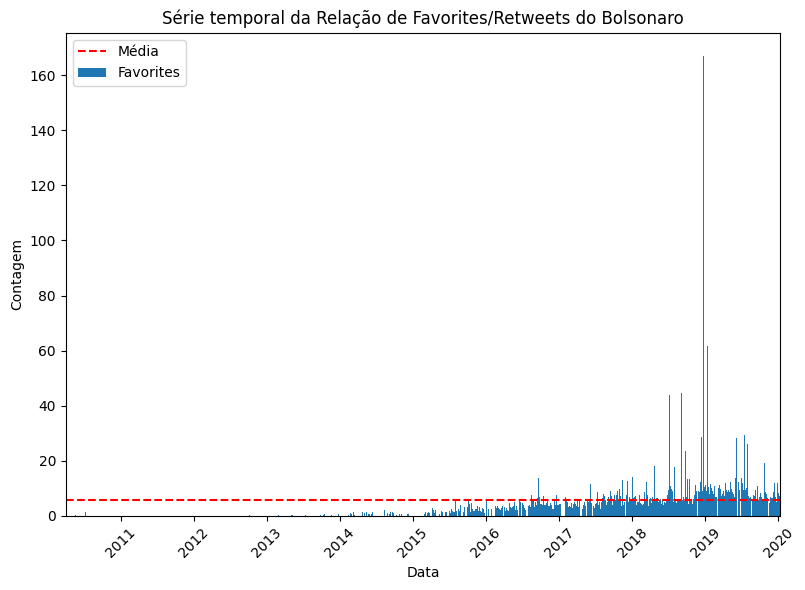

In [ ]:
fav_rt_b = pd.DataFrame()
fav_rt_b['valores'] = bolsonaro_favorites / bolsonaro_retweets

# Filtrar os valores infinitos
fav_rt_b_filtrado = fav_rt_b.replace([np.inf, -np.inf], np.nan).dropna()

soma_totalb = fav_rt_b_filtrado['valores'].sum()
media_b = soma_totalb/len(fav_rt_b['valores'])
print(media_b)

plt.figure(figsize=(8, 6))
plt.bar(bolsonaro_dates, (bolsonaro_favorites/bolsonaro_retweets), linestyle='', label='Favorites')
plt.title('Série temporal da Relação de Favorites/Retweets do Bolsonaro')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.ylim()  # Define limite inferior como 0 e limite superior como o valor máximo entre retweets e favoritações
plt.tight_layout()
plt.xlim(tp_inic['created_at'][0],tp_final['created_at'][0])
plt.axhline(media_b, color='red', linestyle='--', label='Média')
plt.legend()
plt.show()

2.5273702934304714


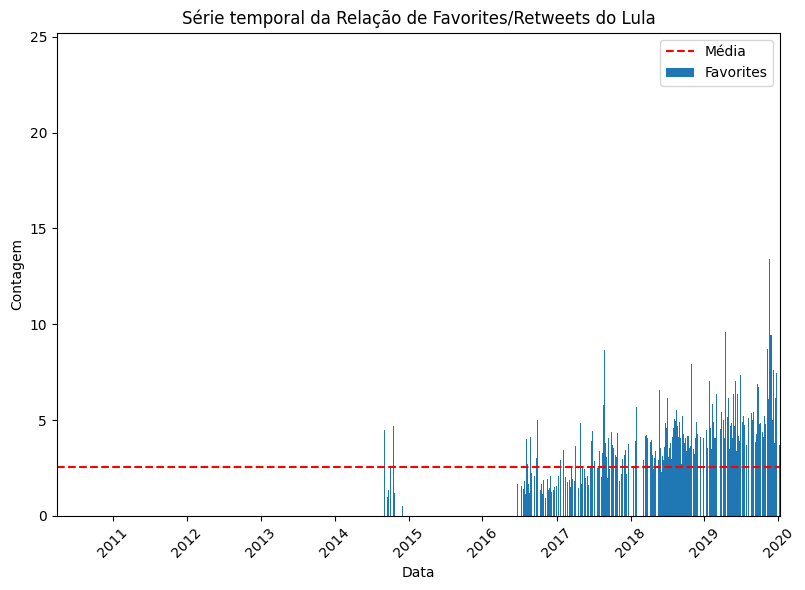

In [ ]:
fav_rt_l = pd.DataFrame()
fav_rt_l['valores'] = lula_favorites / lula_retweets

# Filtrar os valores infinitos
fav_rt_l_filtrado = fav_rt_l.replace([np.inf, -np.inf], np.nan).dropna()

soma_totall = fav_rt_l_filtrado['valores'].sum()
media_l = soma_totall/len(fav_rt_l['valores'])
print(media_l)

plt.figure(figsize=(8, 6))
plt.bar(lula_dates, (lula_favorites/lula_retweets), linestyle='', label='Favorites')
plt.title('Série temporal da Relação de Favorites/Retweets do Lula')
plt.xlabel('Data')
plt.ylabel('Contagem')

plt.xticks(rotation=45)
plt.ylim()  # Define limite inferior como 0 e limite superior como o valor máximo entre retweets e favoritações
plt.tight_layout()
plt.xlim(tp_inic['created_at'][0],tp_final['created_at'][0])
plt.axhline(media_l, color='red', linestyle='--', label='Média')
plt.legend()
plt.show()

In [ ]:
print('Média da Relação Favorites/Retweets de Bolsonaro: ',media_b)
print('Média da Relação Favorites/Retweets de Lula: ',media_l)

Média da Relação Favorites/Retweets de Bolsonaro:  5.601258692807146
Média da Relação Favorites/Retweets de Lula:  2.5273702934304714


Para a Relação de Favorites por Retweets, nota-se que a de Bolsonaro é bem maior que a de Lula. E comparando a média dessa métrica ao longo do tempo, a média de Bolsonaro é mais do que o dobro da de Lula, chegando a valores de mais de 160 Favorites para cada Retweet.

Essa métrica acompanha a proporcionalidade dos dados, logo, mesmo que o público de Bolsonaro seja mais engajado que o de Lula, a relação deveria ser pelo menos parecida.

### Marcos (Bolsonaro)


Periodo Impeachment de Dilma Rousseff


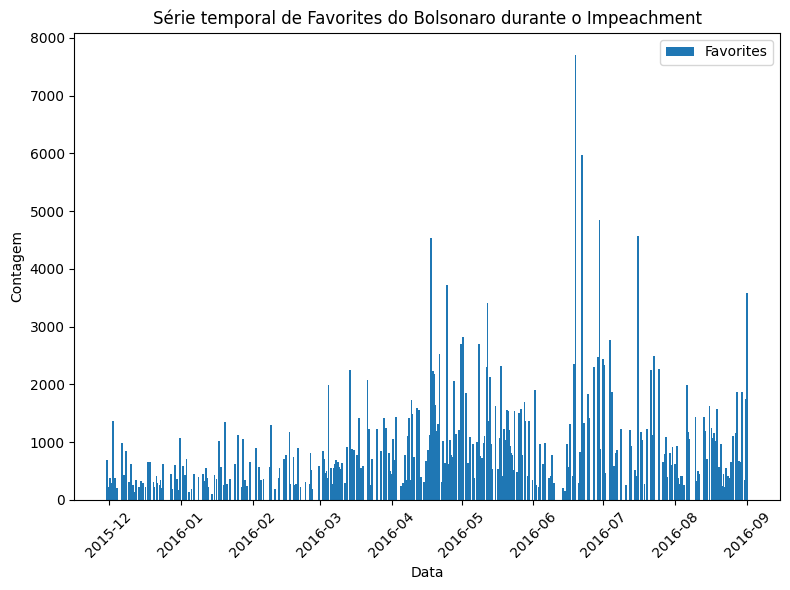

In [ ]:
#Impeachment de Dilma Rousseff - Início em dezembro de 2015; fim em 31 de agosto de 2016
filtrob_imp = (df_bolsonaro['created_at']> pd.to_datetime('2015-11-30', utc=True))&(df_bolsonaro['created_at']< pd.to_datetime('2016-09-01', utc=True))
df_B_imp = df_bolsonaro[filtrob_imp]
print('Periodo Impeachment de Dilma Rousseff')
cb_imp=''
for p in df_B_imp['full_text'].values:
    cb_imp=cb_imp+ ' '+p
rb_imp = processamento(cb_imp)
sb_imp=pd.Series(rb_imp).value_counts()
sb_imp

plt.figure(figsize=(8, 6))
plt.bar(df_B_imp['created_at'], df_B_imp['favorite_count'], linestyle='', label='Favorites')
plt.title('Série temporal de Favorites do Bolsonaro durante o Impeachment')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
#plt.ylim()  # Define limite inferior como 0 e limite superior como o valor máximo entre retweets e favoritações
plt.tight_layout()
#plt.xlim(tp_inic['created_at'][0],tp_final['created_at'][0])
plt.legend()
plt.show()

Periodo Prisão do Lula


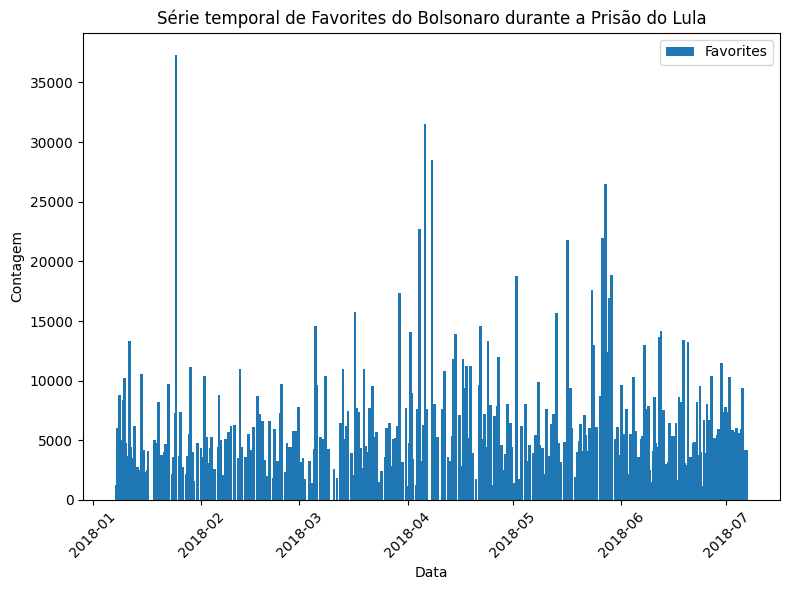

In [ ]:
#Prisão do Lula - 07 de abril de 2018;
filtrob_pris = (df_bolsonaro['created_at']> pd.to_datetime('2018-01-07', utc=True))&(df_bolsonaro['created_at']< pd.to_datetime('2018-07-07', utc=True))
df_B_pris = df_bolsonaro[filtrob_pris]
print('Periodo Prisão do Lula')
cb_pris=''
for p in df_B_pris['full_text'].values:
    cb_pris=cb_pris+ ' '+p
rb_pris = processamento(cb_pris)
sb_pris=pd.Series(rb_pris).value_counts()
sb_pris

plt.figure(figsize=(8, 6))
plt.bar(df_B_pris['created_at'], df_B_pris['favorite_count'], linestyle='', label='Favorites')
plt.title('Série temporal de Favorites do Bolsonaro durante a Prisão do Lula')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

Periodo Copa 2018


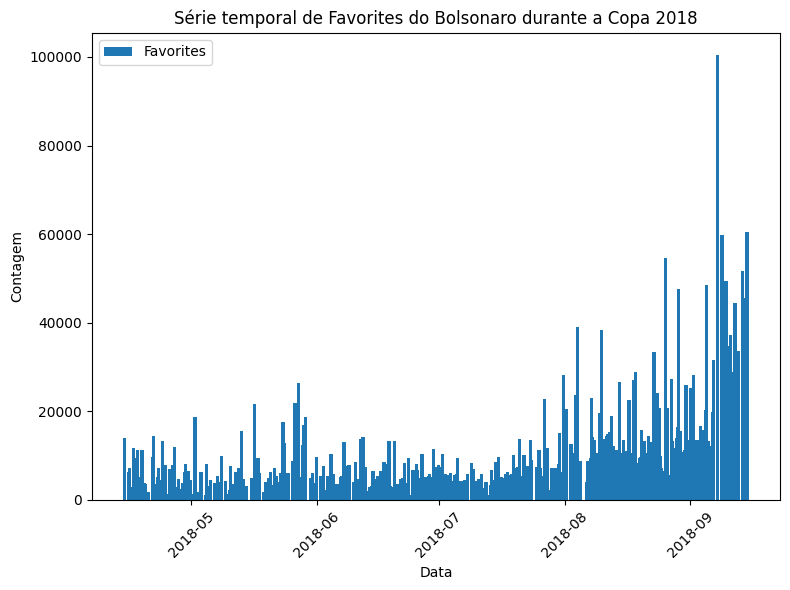

In [ ]:
#Copa do Mundo 2018: 14 de Junho de 2018 - 15 de julho de 2018;
filtrob_copa = (df_bolsonaro['created_at']> pd.to_datetime('2018-04-14', utc=True))&(df_bolsonaro['created_at']< pd.to_datetime('2018-09-15', utc=True))
df_B_copa = df_bolsonaro[filtrob_copa]
print('Periodo Copa 2018')
cb_copa=''
for p in df_B_copa['full_text'].values:
    cb_copa=cb_copa+ ' '+p
rb_copa = processamento(cb_copa)
sb_copa=pd.Series(rb_copa).value_counts()
sb_copa

plt.figure(figsize=(8, 6))
plt.bar(df_B_copa['created_at'], df_B_copa['favorite_count'], linestyle='', label='Favorites')
plt.title('Série temporal de Favorites do Bolsonaro durante a Copa 2018')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

### Marcos (Lula)

Periodo Impeachment de Dilma Rousseff


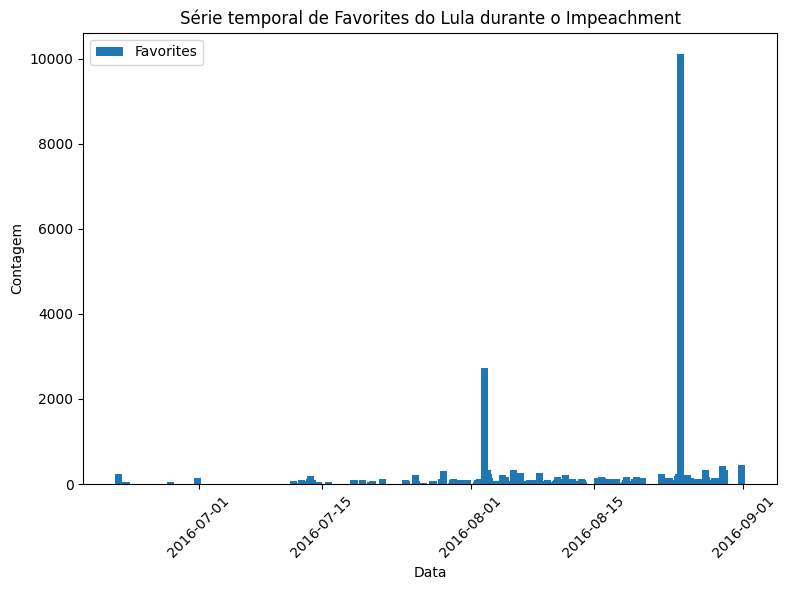

In [ ]:
#Impeachment de Dilma Rousseff - Início em dezembro de 2015; fim em 31 de agosto de 2016
filtrol_imp = (df_lula['created_at']> pd.to_datetime('2015-11-30', utc=True))&(df_lula['created_at']< pd.to_datetime('2016-09-01', utc=True))
df_l_imp = df_lula[filtrol_imp]
print('Periodo Impeachment de Dilma Rousseff')
cl_imp=''
for p in df_l_imp['full_text'].values:
    cl_imp=cl_imp+ ' '+p
rl_imp = processamento(cl_imp)
sl_imp=pd.Series(rl_imp).value_counts()
sl_imp

plt.figure(figsize=(8, 6))
plt.bar(df_l_imp['created_at'], df_l_imp['favorite_count'], linestyle='', label='Favorites')
plt.title('Série temporal de Favorites do Lula durante o Impeachment')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

Com base nos gráficos do Processo de Impeachment de Dilma, pode-se notar que a quantidade de Favorites de Bolsonaro aumentou durante o processo. Entretanto, as métricas de Lula diminuiram e ficaram bem abaixo do seu opositor. Logo, pode-se inferir que o Processo de Impeachment de Dilma elevou a popularidade do perfil de Bolsonaro no Twitter.

Periodo Prisão do Lula


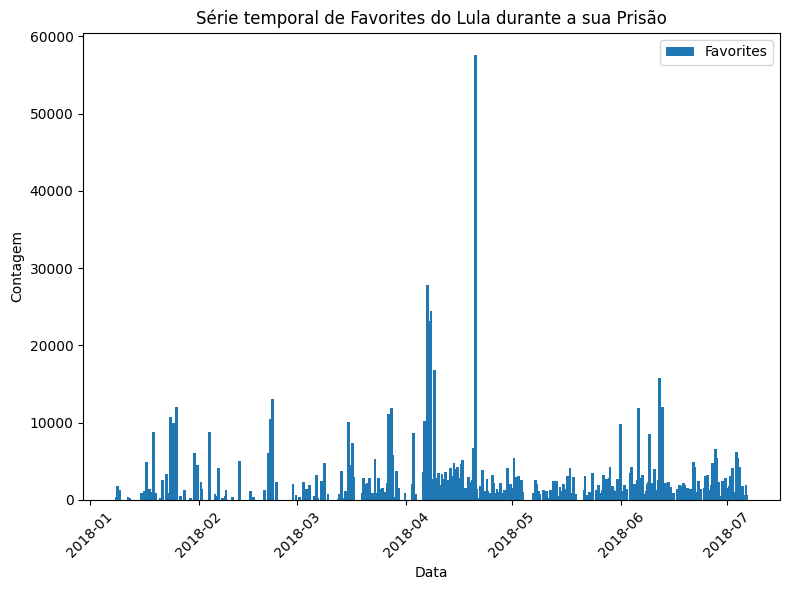

In [ ]:
#Prisão do Lula - 07 de abril de 2018;
filtrol_pris = (df_lula['created_at']> pd.to_datetime('2018-01-07', utc=True))&(df_lula['created_at']< pd.to_datetime('2018-07-07', utc=True))
df_l_pris = df_lula[filtrol_pris]
print('Periodo Prisão do Lula')
cl_pris=''
for p in df_l_pris['full_text'].values:
    cl_pris=cl_pris+ ' '+p
rl_pris = processamento(cl_pris)
sl_pris=pd.Series(rl_pris).value_counts()
sl_pris

plt.figure(figsize=(8, 6))
plt.bar(df_l_pris['created_at'], df_l_pris['favorite_count'], linestyle='', label='Favorites')
plt.title('Série temporal de Favorites do Lula durante a sua Prisão')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

Baseado nos graficos do periodo da Prisão de Lula, pode-se notar que os Likes em suas postagens se elevaram a medida do tempo. Contudo, seu opositor Bolsonaro tambem teve um aumento em seu Twitter, tendo seu pico no periodo mais proximo da prisão.

É interessante observar que, mesmo após a prisão de Lula, postagens continuaram a ser feitas em seu perfil no Instagram. Essas postagens são atribuídas à sua equipe de comunicação, conforme informações divulgadas oficialmente.

Essa prática é comum entre personalidades públicas, políticos e celebridades, que geralmente contam com equipes para gerenciar suas redes sociais. O objetivo é manter a presença online, fornecer atualizações e transmitir mensagens políticas mesmo quando a pessoa em questão não tem acesso direto à internet.

No entanto, é importante considerar que essa abordagem pode afetar a percepção do público em relação à autenticidade do perfil. Algumas pessoas podem considerar que o fato de Lula não estar pessoalmente envolvido na gestão do perfil o torna menos genuíno e afasta um certo público.Logo, isso é algo que pode justificar a quantidade menor em likes e retweets em seu perfil.

Periodo Copa 2018


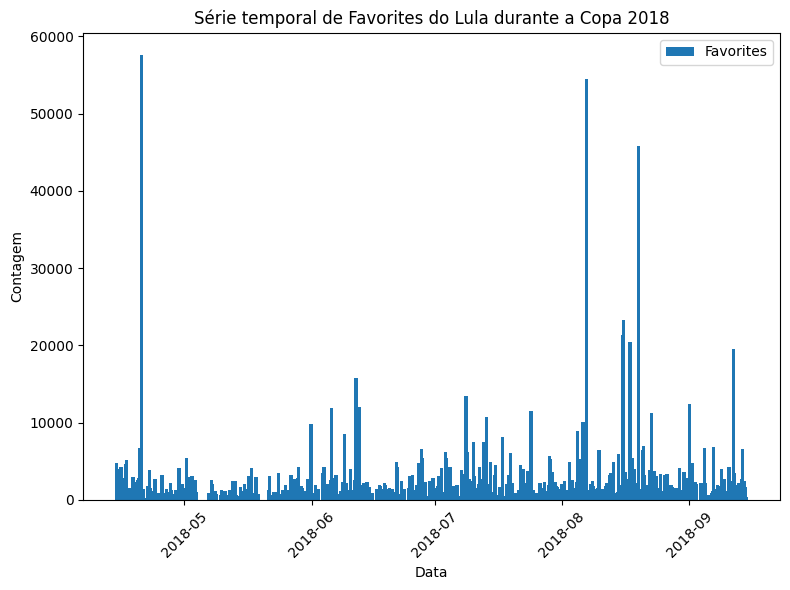

In [ ]:
#Copa do Mundo 2018: 14 de Junho de 2018 - 15 de julho de 2018;
filtrol_copa = (df_lula['created_at']> pd.to_datetime('2018-04-14', utc=True))&(df_lula['created_at']< pd.to_datetime('2018-09-15', utc=True))
df_l_copa = df_lula[filtrol_copa]
print('Periodo Copa 2018')
cl_copa=''
for p in df_l_copa['full_text'].values:
    cl_copa=cl_copa+ ' '+p
rl_copa = processamento(cl_copa)
sl_copa=pd.Series(rl_copa).value_counts()
sl_copa

plt.figure(figsize=(8, 6))
plt.bar(df_l_copa['created_at'], df_l_copa['favorite_count'], linestyle='', label='Favorites')
plt.title('Série temporal de Favorites do Lula durante a Copa 2018')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

Ao analisar os gráficos do período da Copa de 2018, é possível observar uma redução no número de "Favorites" nos perfis tanto de Bolsonaro quanto de Lula. Essa diminuição pode estar associada ao fato de que eventos esportivos de grande magnitude, como a Copa do Mundo, geralmente capturam a atenção do público e podem desviar o foco da política.

Durante eventos esportivos de grande relevância, é comum que as pessoas se envolvam emocionalmente com as competições e dediquem mais tempo a assistir aos jogos, acompanhar notícias relacionadas e interagir nas redes sociais sobre o assunto. Nesse contexto, a participação política e o interesse em conteúdo político podem ser temporariamente reduzidos.

## Frequencia de Palavras

In [ ]:
conteudo1=''
for p in dfl['full_text'].values:
    conteudo1=conteudo1+ ' '+p

In [ ]:
conteudo1

' presidente ir dar passeio em esse eleição ganhar primeiro turno haddad Fernando vice chapa coletivo imprensa sobre decisão onubrasil assegurar direito candidato dilmabr afirmar querer acabar ministério provavelmente acabar mulher negro direito humano pt dar cidadania mulher fazer política legalizar doméstico aprovar cota continuar ser lulinha paz amor gente poder deitar raiva acordar raiva lulanoradio olhar último pesquisa ver único coisa fazer acreditar mesmo gwgzetbi s chico buarque carol proner celso Amorim falar sobre visita ex presidente em esse quinta feira livre democracia vídeo yezxlg jtq acompanhar vivo cerimônia entregar doutor honoris causar ufpi dgjyouo lulapelopiauí quanto dia deixar lá lula ir nascer em este país ocupasaobernardo infelizmente parecer existir legislação resto imaginávar julgamento registro incluír minuto antes fechamento pautar tse imaginávamos prazo respeitar haddad Fernando coletivo imprensa acontecer incluímos povo trabalhador pobre Orçamento União pe

In [ ]:
#Dividir o processamento em 3 (Memoria Insuficiente)
tamanho_lista = len(conteudo1)
tamanho_parte = tamanho_lista // 3  # tamanho aproximado de cada parte

parte1 = conteudo1[:tamanho_parte]  # primeira parte
parte2 = conteudo1[tamanho_parte:2*tamanho_parte]  # segunda parte
parte3 = conteudo1[2*tamanho_parte:]
#PROCESSAMENTO LULA -------------------------------------------------------------------------------------------------
resultado1_LL = processamento(parte1)
resultado2_LL = processamento(parte2)
resultado3_LL = processamento(parte3)
LL_Final = resultado1_LL + resultado2_LL + resultado3_LL

In [ ]:
s1=pd.Series(LL_Final).value_counts()
s1[0:40]

ir                   2008
país                 1777
fazer                1724
presidente           1410
querer               1396
povo                 1354
haddad               1270
poder                1130
fernando             1017
todo                  991
gente                 918
ter                   890
dia                   878
dizer                 855
saber                 824
falar                 822
ano                   819
governo               747
pt                    721
agora                 715
aqui                  655
porque                638
hoje                  616
político              604
foto                  583
ex                    569
candidato             568
pobre                 565
pessoa                562
contra                558
bom                   558
dar                   544
grande                533
sobre                 532
direito               524
vivo                  521
voltar                520
precisar              497
lulaporminas

<BarContainer object of 40 artists>

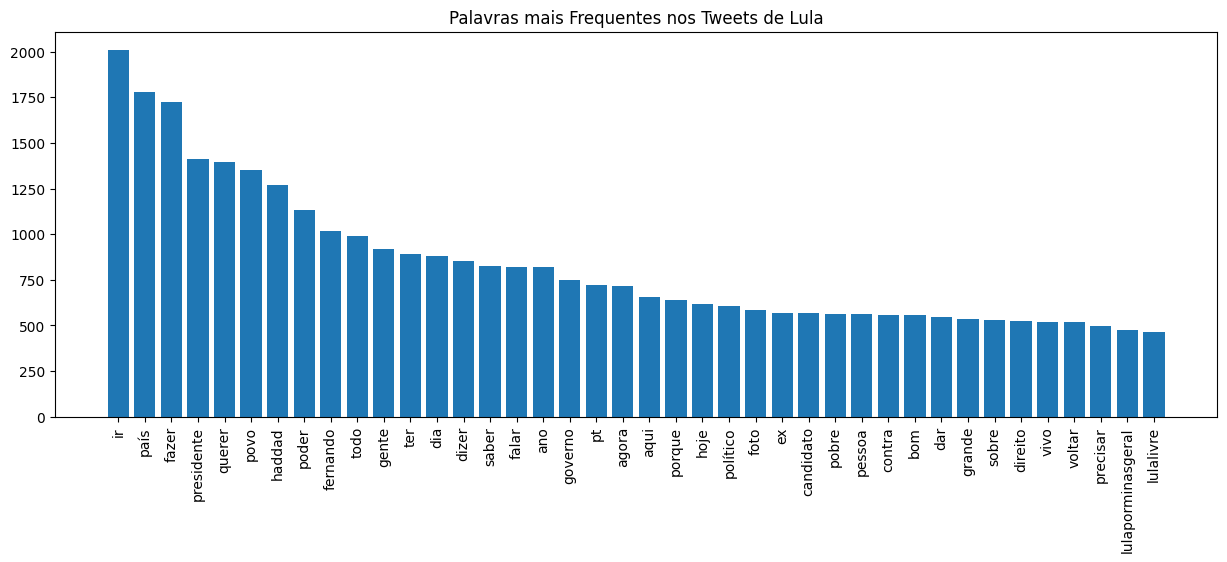

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.title('Palavras mais Frequentes nos Tweets de Lula')
plt.bar(s1.index[0:40],s1.values[0:40])

<BarContainer object of 40 artists>

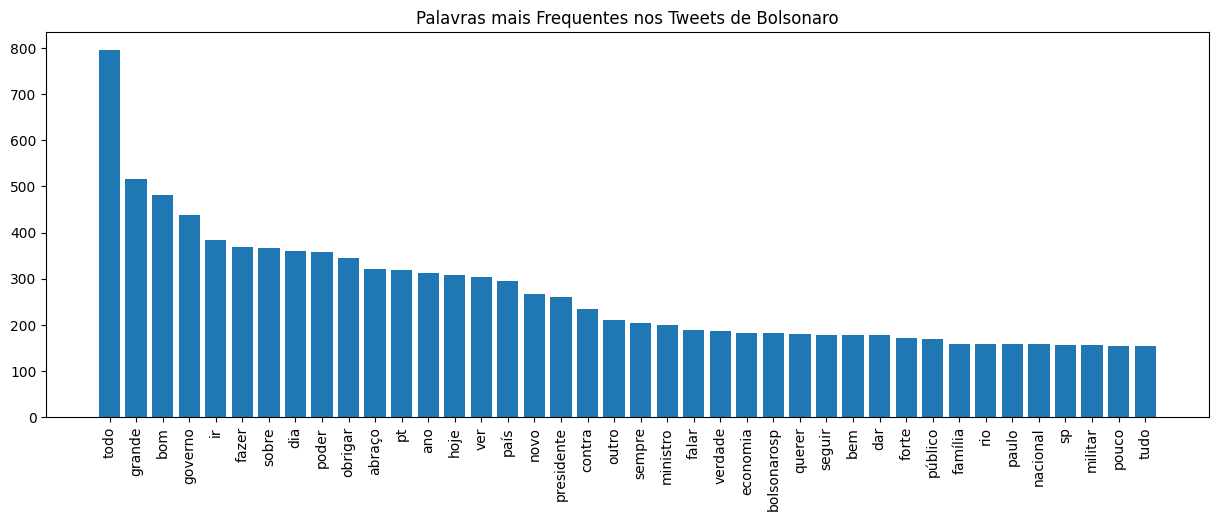

In [ ]:
conteudo2=''
for p in dfb['full_text'].values:
    conteudo2=conteudo2+ ' '+p
resultado_BB = processamento(conteudo2)
s2=pd.Series(resultado_BB).value_counts()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.title('Palavras mais Frequentes nos Tweets de Bolsonaro')
plt.bar(s2.index[0:40],s2.values[0:40])

In [ ]:
s2[0:40]

todo           795
grande         516
bom            482
governo        438
ir             383
fazer          369
sobre          366
dia            359
poder          357
obrigar        345
abraço         322
pt             318
ano            312
hoje           308
ver            304
país           296
novo           266
presidente     260
contra         234
outro          210
sempre         203
ministro       200
falar          189
verdade        186
economia       183
bolsonarosp    183
querer         180
seguir         178
bem            178
dar            178
forte          171
público        169
família        159
rio            159
paulo          159
nacional       158
sp             157
militar        157
pouco          155
tudo           154
dtype: int64

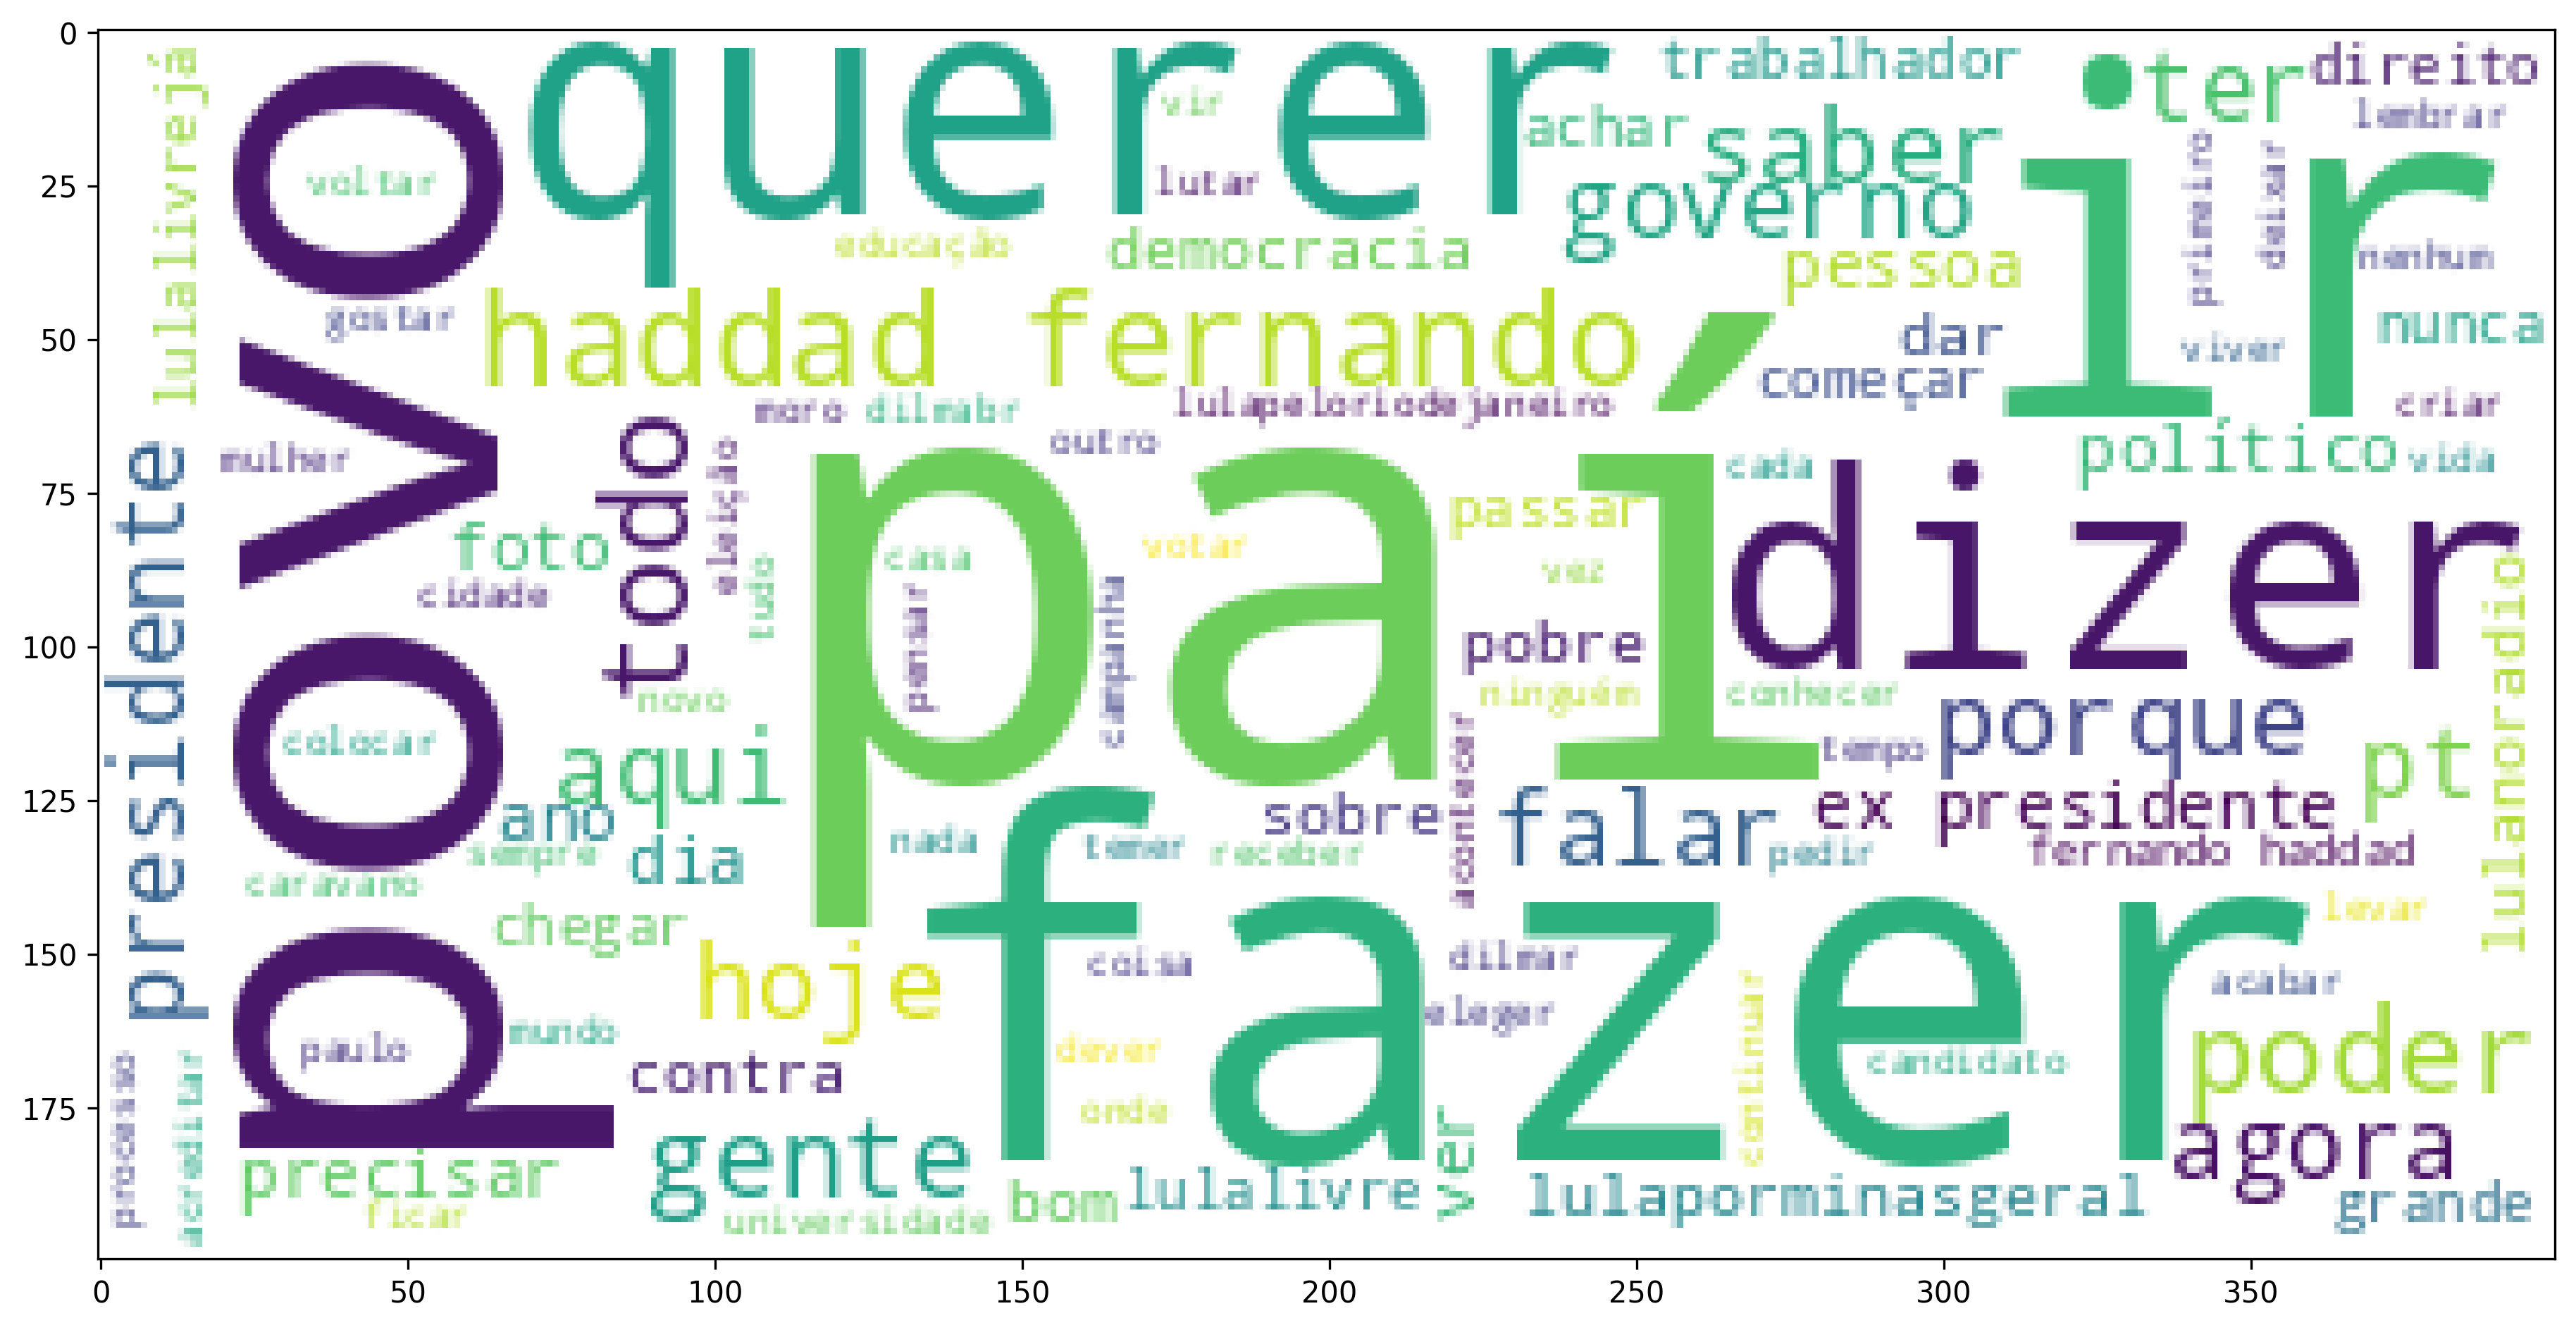

In [ ]:
from wordcloud import WordCloud

cloud=WordCloud(background_color='white',max_words=100,colormap='viridis')
cloud=cloud.generate(' '.join(LL_Final))
plt.figure(figsize=(15,15),dpi=300)
plt.imshow(cloud)

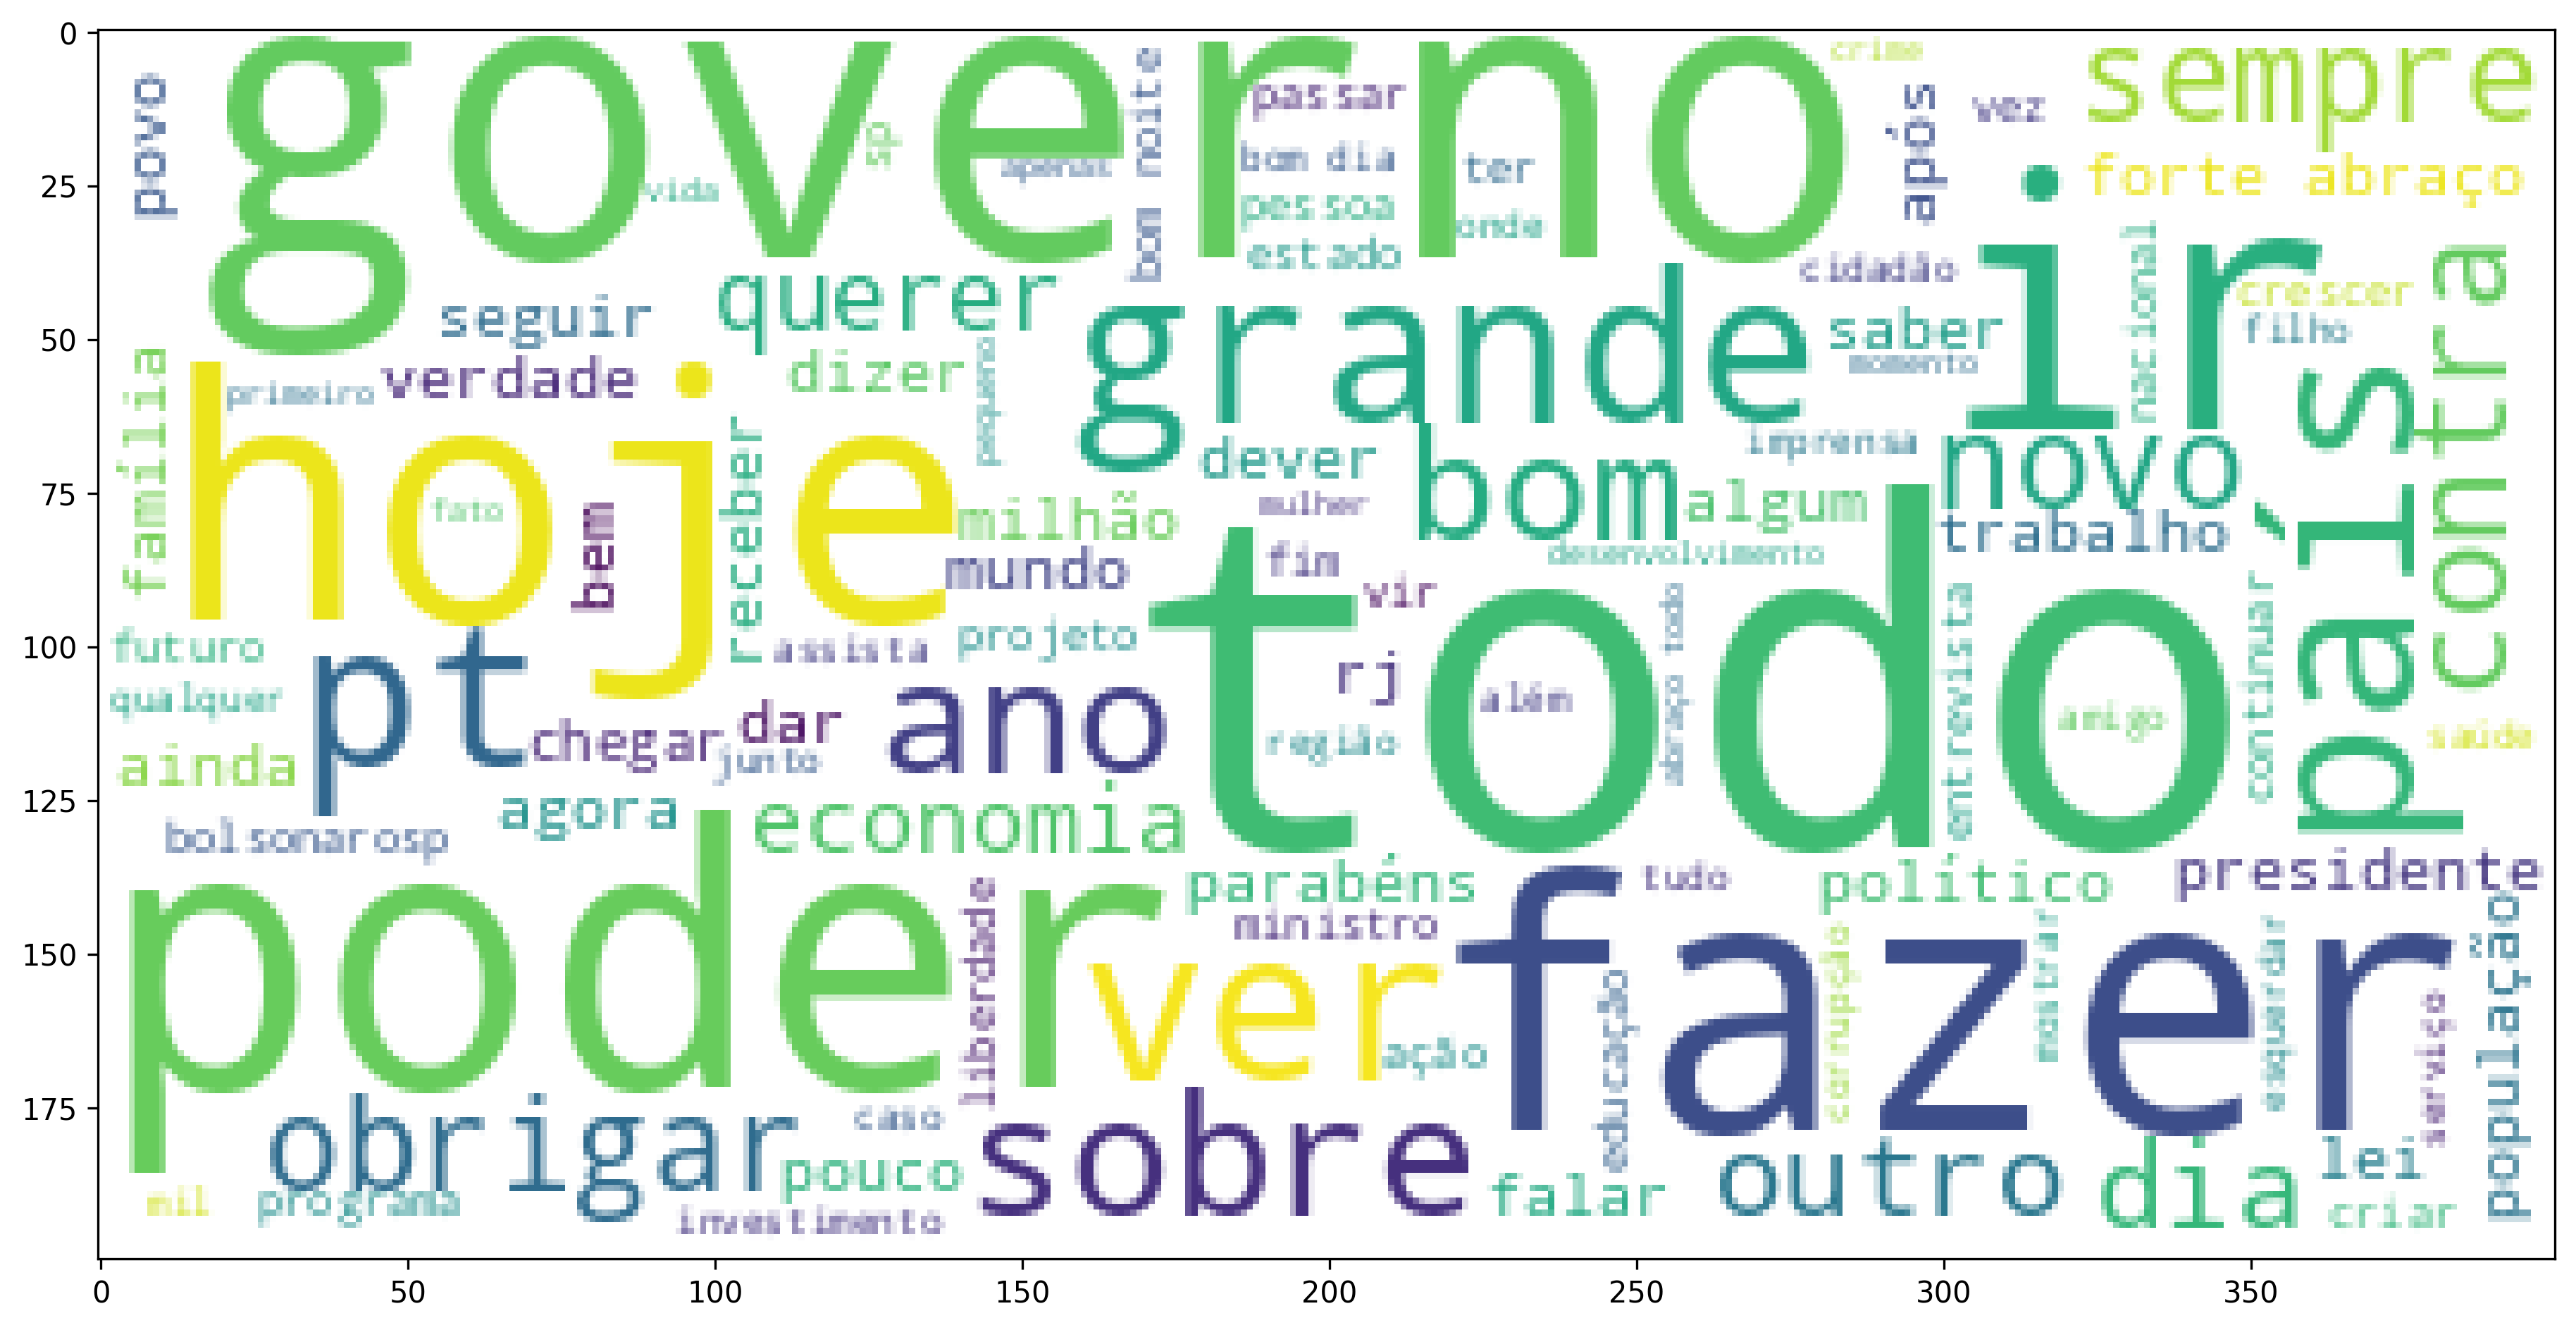

In [ ]:
cloud=WordCloud(background_color='white',max_words=100,colormap='viridis')
cloud=cloud.generate(' '.join(resultado_BB))
plt.figure(figsize=(15,15),dpi=300)
plt.imshow(cloud)

**@LulaOficial**

Com base nas palavras mais frequentes nos tweets de Lula, é possível fazer algumas inferências em relação à sua ideologia política. No entanto, é importante ressaltar que essa análise é baseada apenas nas palavras mais mencionadas e não fornece uma compreensão completa ou abrangente de sua ideologia. Além disso, essas inferências devem ser interpretadas com cautela, uma vez que as palavras mais frequentes podem variar dependendo do contexto e do período analisado.

Algumas palavras-chave frequentes nos tweets de Lula incluem: "país", "presidente", "povo", "poder", "governo", "PT", "político", "pobre" e "direito". Essas palavras sugerem uma ênfase em questões relacionadas ao país, ao povo, ao exercício do poder e às políticas governamentais. Além disso, a menção frequente ao Partido dos Trabalhadores (PT) indica uma associação política e ideológica com essa sigla.

Palavras como "lulalivre" e "lulaporminasgeral" sugerem apoio e solidariedade a Lula como figura política e podem refletir uma narrativa de injustiça em relação a sua prisão (dependendo do período analisado).

No entanto, é importante destacar que essas inferências são limitadas e não capturam toda a complexidade e diversidade da ideologia de Lula. Para uma compreensão mais completa, seria necessário analisar uma variedade de fontes, discursos e ações políticas de Lula ao longo do tempo.




-------------------------------------------------------------------------------





**@jairbolsonaro**

Com base nas palavras mais frequentes nos tweets de Bolsonaro, é possível fazer algumas inferências em relação à sua ideologia política. No entanto, assim como mencionado anteriormente, essa análise é baseada apenas nas palavras mais mencionadas e não fornece uma compreensão completa ou abrangente de sua ideologia. Além disso, essas inferências devem ser interpretadas com cautela, pois as palavras mais frequentes podem variar dependendo do contexto e do período analisado.

Algumas palavras-chave frequentes nos tweets de Bolsonaro incluem: "governo", "poder", "PT", "presidente", "contra", "economia", "militar", "família" e "nacional". Essas palavras sugerem uma ênfase em temas relacionados ao exercício do poder, ao governo, à economia, às forças militares, à família e à identidade nacional. A menção frequente ao Partido dos Trabalhadores (PT) indica uma oposição política e ideológica a essa sigla.

Outras palavras como "todo", "grande" e "bom" podem estar associadas a uma retórica otimista ou enfática, que busca destacar realizações e aspectos positivos.

No entanto, assim como mencionado anteriormente, é importante destacar que essas inferências são limitadas e não capturam toda a complexidade e diversidade da ideologia de Bolsonaro. Para uma compreensão mais completa, seria necessário analisar uma variedade de fontes, discursos e ações políticas de Bolsonaro ao longo do tempo.

# TF-IDF com Trigramas

In [ ]:
tfidf_vect = TfidfVectorizer(binary=False, max_features=50000)

#rodar
txti3 = dfwords['term']

# Vetorizando txtlb
X_tfidf_i3 = tfidf_vect.fit_transform(txti3)
feature_names_i3 = tfidf_vect.get_feature_names_out()

print(X_tfidf_i3)

  (0, 314)	0.7081243345764189
  (0, 501)	0.4713623011193645
  (0, 210)	0.5257161856592979
  (1, 435)	0.48935933142028387
  (1, 175)	0.7166724308503645
  (1, 210)	0.4968984520109942
  (2, 72)	0.685661424329144
  (2, 668)	0.5592159472609922
  (2, 501)	0.46598920107221437
  (3, 294)	0.6829509030736237
  (3, 435)	0.5401414923421041
  (3, 501)	0.4917572899727737
  (4, 665)	0.6385519916024126
  (4, 620)	0.4864337313520856
  (4, 55)	0.5963502150779183
  (5, 15)	0.6740830147999542
  (5, 435)	0.5461985573901104
  (5, 501)	0.49727178188910637
  (6, 440)	0.6561707612272177
  (6, 174)	0.6259190786584109
  (6, 134)	0.4215035457524642
  (7, 707)	0.6014728664028695
  (7, 448)	0.5447001537668752
  (7, 720)	0.5844075063407884
  (8, 467)	0.7299152066003496
  :	:
  (2708, 210)	0.5300065580713471
  (2709, 772)	0.58462985799879
  (2709, 42)	0.5566791005589785
  (2709, 766)	0.5901832835121317
  (2710, 762)	0.6048045713447627
  (2710, 252)	0.4862988794783068
  (2710, 210)	0.6306542874655027
  (2711, 591)	0.6

### Gerar Trigramas

In [ ]:
dfTesq

,texto,label
0,"[ideologia, esquerda, conjunto, complexo, idei...",1
1,"[corrente, pensamento, buscar, transformar, es...",1
2,"[cerne, ideologia, esquerda, marxismo, desenvo...",1
3,"[marxismo, analisar, sociedade, divider, class...",1
4,"[exploração, ver, base, desigualdade, social, ...",1
...,...,...
444,"[promoção, igualdade, gênero, relação, familia...",1
445,"[lutar, valorização, proteção, direito, pessoa...",1
446,"[defesa, direito, liberdade, religião, crença]",1
447,"[combater, discriminação, violência, contra, p...",1


In [ ]:
import string
from sklearn.feature_extraction.text import CountVectorizer
#ideologia 1
vectorizer = CountVectorizer(ngram_range=(3, 3))
X1 = vectorizer.fit_transform(' '.join(text).lower() for text in dfTesq['texto'])
features = vectorizer.get_feature_names_out()

print("\n\nFeatures : \n", features)
print("\n\nX1 : \n", X1.toarray())

#ideologia 2
vectorizer = TfidfVectorizer(ngram_range=(3, 3))
X2 = vectorizer.fit_transform(' '.join(text).lower() for text in dfTesq['texto'])
scores = X2.toarray()
features = vectorizer.get_feature_names_out()

print("\n\nScores:\n", scores)
print("\n\nFeatures:\n", features)

# Getting top ranking features
sums = X2.sum(axis = 0)
data13 = []
for col, term in enumerate(features):
    data13.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data13, columns = ['term','rank'])
wordsesq = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head Ideologia (Trigramas): \n", wordsesq.head(30))
#wordsesq.to_csv('/content/drive/MyDrive/DisciplinaIA/PROJETO/DADOS/Trigrama/btrigrama.csv', index=False)



Features : 
 ['abertura migração acolhimento' 'abordagem descentralizar participativo'
 'abordagem relação estado' ... 'âmbito político econômico'
 'ênfase justiça social' 'ênfase liberdade individual']


X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Features:
 ['abertura migração acolhimento' 'abordagem descentralizar participativo'
 'abordagem relação estado' ... 'âmbito político econômico'
 'ênfase justiça social' 'ênfase liberdade individual']


Words head Ideologia (Trigramas): 
                                   term       rank
1076           proteção direito pessoa  13.734844
1045   promoção igualdade oportunidade  11.458753
826         lutar valorização proteção  10.784823
1326      valorização proteção direito  10.564019
1080    

In [ ]:
wordsesq['label']=1

In [ ]:
import string
from sklearn.feature_extraction.text import CountVectorizer
#ideologia
vectorizer = CountVectorizer(ngram_range=(3, 3))
X1 = vectorizer.fit_transform(' '.join(text).lower() for text in dfTdir['texto'])
features = vectorizer.get_feature_names_out()

print("\n\nFeatures : \n", features)
print("\n\nX1 : \n", X1.toarray())

#ideologia
vectorizer = TfidfVectorizer(ngram_range=(3, 3))
X2 = vectorizer.fit_transform(' '.join(text).lower() for text in dfTdir['texto'])
scores = X2.toarray()
features = vectorizer.get_feature_names_out()

print("\n\nScores:\n", scores)
print("\n\nFeatures:\n", features)

# Getting top ranking features
sums = X2.sum(axis = 0)
data13 = []
for col, term in enumerate(features):
    data13.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data13, columns = ['term','rank'])
wordsdir = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head Ideologia: \n", wordsdir.head(30))
#wordsdir.to_csv('/content/drive/MyDrive/DisciplinaIA/PROJETO/DADOS/Trigrama/btrigrama.csv', index=False)



Features : 
 ['abordagem ainda radical' 'abordagem duro relação'
 'abordagem equilibrar relação' ... 'ênfase segurança combate'
 'ênfase valorização competitividade' 'ênfase valorização trabalho']


X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Features:
 ['abordagem ainda radical' 'abordagem duro relação'
 'abordagem equilibrar relação' ... 'ênfase segurança combate'
 'ênfase valorização competitividade' 'ênfase valorização trabalho']


Words head Ideologia: 
                                      term      rank
272              defesa liberdade escolha  4.605363
193             crença importância defesa  4.403517
999         promoção liberdade associação  3.775986
425       enfatizar importância liberdade  3.410368
48                 apo

In [ ]:
wordsdir['label']=2

In [ ]:
wordsesq

,term,rank,label
1076,proteção direito pessoa,13.734844,1
1045,promoção igualdade oportunidade,11.458753,1
826,lutar valorização proteção,10.784823,1
1326,valorização proteção direito,10.564019,1
1080,proteção direito trabalhador,10.461285,1
...,...,...,...
142,cidadã intervenção estatal,0.232946,1
541,estatal economia sustentabilidade,0.232946,1
509,esquerda caracterizar ênfase,0.232946,1
461,economia sustentabilidade ambiental,0.232946,1


In [ ]:
wordsdir

,term,rank,label
272,defesa liberdade escolha,4.605363,2
193,crença importância defesa,4.403517,2
999,promoção liberdade associação,3.775986,2
425,enfatizar importância liberdade,3.410368,2
48,apoiar político promor,3.316663,2
...,...,...,...
1092,regulamentação excessivo imposto,0.218218,2
22,acreditar interferência excessivo,0.218218,2
107,capacidade indivíduo buscar,0.218218,2
374,economia através regulamentação,0.218218,2


In [ ]:
dfwords = pd.DataFrame()
dfwords = pd.concat([wordsdir,wordsesq]).reset_index(drop=True)
dfwords

,term,rank,label
0,defesa liberdade escolha,4.605363,2
1,crença importância defesa,4.403517,2
2,promoção liberdade associação,3.775986,2
3,enfatizar importância liberdade,3.410368,2
4,apoiar político promor,3.316663,2
...,...,...,...
2712,cidadã intervenção estatal,0.232946,1
2713,estatal economia sustentabilidade,0.232946,1
2714,esquerda caracterizar ênfase,0.232946,1
2715,economia sustentabilidade ambiental,0.232946,1


## Dados de Treino e Teste

In [ ]:
#Dados de Treino e Teste com Dataset de Ideologias (Trigramas)
X_trainii, X_testii, y_trainii, y_testii = train_test_split(X_tfidf_i3, dfwords['label'],
                                                        test_size=0.3, random_state = 10)

## Arvore de Decisão

              precision    recall  f1-score   support

           1       0.75      0.85      0.80       394
           2       0.84      0.74      0.79       422

    accuracy                           0.79       816
   macro avg       0.80      0.79      0.79       816
weighted avg       0.80      0.79      0.79       816

Acurácia:  0.7928921568627451

AUROC: 0.7948793514085694

F1-Score: 0.7924796416730489

Matriz de confusão:


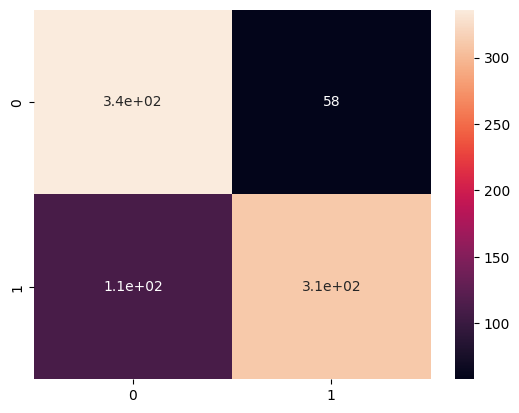

In [ ]:
# Criar uma instância do modelo de Árvore de Decisão
modeldt3 = DecisionTreeClassifier(max_depth=5000)

# Treinar o modelo utilizando o conjunto de treinamento
modeldt3.fit(X_trainii, y_trainii)

# Fazer previsões no conjunto de teste
y_predii = modeldt3.predict(X_testii)

# Avaliar o desempenho do modelo
report = classification_report(y_testii, y_predii)
print(report)
mostra_metricas(y_testii, y_predii)

In [ ]:
bol=[]
lul=[]
def b_ad3(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = modeldt3.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")
    bol.append("Esquerda")


  else:
    #print("Direita")
    bol.append("Direita")

def l_ad3(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = modeldt3.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")

    lul.append("Esquerda")

  else:
    #print("Direita")

    lul.append("Direita")

bol.clear()
for i in range(0,len(dfb['full_text'])):
    b_ad3(dfb['full_text'][i])

print('Bolsonaro:',bol.count('Direita')/len(bol))

lul.clear()
for i in range(0,len(dfl['full_text'])):
    l_ad3(dfl['full_text'][i])
print('Lula:',lul.count('Esquerda')/len(lul))

Bolsonaro: 0.30291433617898145
Lula: 0.7141902279259408


Acurácia:  0.8590686274509803

AUROC: 0.8603760194384968

F1-Score: 0.8590167682991924

Matriz de confusão:


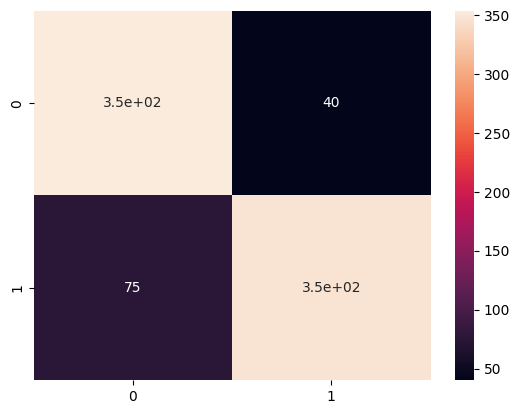

In [ ]:
# Instanciando a reg. logistica
reglog3 = LogisticRegression()

#y1_train = np.ravel(y1_train)

reglog3.fit(X_trainii, y_trainii)
y1_reglog_predii = reglog3.predict(X_testii)

reglog3 = LogisticRegression()
reglog3.fit(X_trainii, y_trainii)

# Predicao
y_reglog_predii = reglog3.predict(X_testii)
mostra_metricas(y_testii, y_reglog_predii)

In [ ]:
bol=[]
lul=[]
def bpred_reglog(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = reglog3.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")
    bol.append("Esquerda")


  else:
    #print("Direita")
    bol.append("Direita")

def lpred_reglog(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = reglog3.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")

    lul.append("Esquerda")

  else:
    #print("Direita")

    lul.append("Direita")

bol.clear()
for i in range(0,len(dfb['full_text'])):
    bpred_reglog(dfb['full_text'][i])

print('Bolsonaro:',bol.count('Direita')/len(bol))

lul.clear()
for i in range(0,len(dfl['full_text'])):
    lpred_reglog(dfl['full_text'][i])
print('Lula:',lul.count('Esquerda')/len(lul))

Bolsonaro: 0.2895201648513394
Lula: 0.7011563398168572


## SVM

Acurácia: 0.8725490196078431
Acurácia:  0.8590686274509803

AUROC: 0.8603760194384968

F1-Score: 0.8590167682991924

Matriz de confusão:


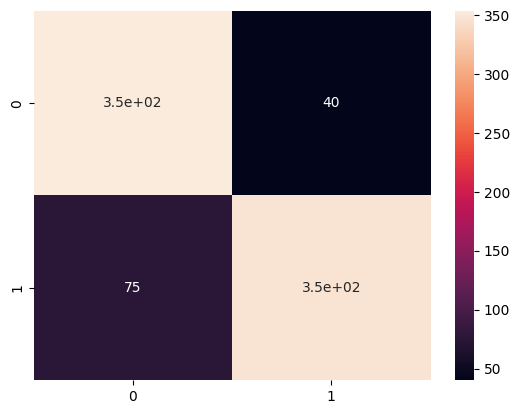

In [ ]:
modelsvm = SVC(kernel='linear')  # Escolha o kernel desejado (linear, polynomial, rbf, etc.)
modelsvm.fit(X_trainii, y_trainii)

y_predii = modelsvm.predict(X_testii)
accuracy = accuracy_score(y_testii, y_predii)
print("Acurácia:", accuracy)
mostra_metricas(y_testii, y_reglog_predii)

In [ ]:
bol=[]
lul=[]
def nova_predicaobsvm(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = modelsvm.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")
    bol.append("Esquerda")

  else:
    #print("Direita")
    bol.append("Direita")

def nova_predicaolsvm(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = modelsvm.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")

    lul.append("Esquerda")

  else:
    #print("Direita")

    lul.append("Direita")

bol.clear()
for i in range(0,len(dfb['full_text'])):
    nova_predicaobsvm(dfb['full_text'][i])
print('Bolsonaro:',bol.count('Direita')/len(bol))


lul.clear()
for i in range(0,len(dfl['full_text'])):
    nova_predicaolsvm(dfl['full_text'][i])
print('Lula:',lul.count('Esquerda')/len(lul))

Bolsonaro: 0.2880482778922579
Lula: 0.7219437203395495


# TF-IDF

In [ ]:
txti.head(30)


0     ideologia esquerdo conjunto complexo ideia pol...
1     corrente pensamento buscar transformar estrutu...
2     cerne ideologio esquerdo marxismo desenvolver ...
3     marxismo analisar sociedade ser divider classe...
4     exploração ver base desigualdade social econômico
5     marxismo buscar superação sistema capitalista ...
6     entanto esquerdar abranger variedade corrente ...
7     principal divergência dentro esquerdo abordage...
8     enquanto algum grupo defender intervenção esta...
9     socialismo democrático corrente buscar combina...
10    defender propriedade social meio produção part...
11    país suécir noruegar dinamarco adotar modelo s...
12    anarquismo outro corrente enquadra dentro ideo...
13    anarquista buscar sociedade hierarquio basear ...
14    acreditar estrutura social econômico dever org...
15    outro aspecto central ideologia esquerdo luta ...
16    incluir busco salário justo condição trabalho ...
17    esquerda preocupar garantia direito social

In [ ]:
tfidf_vect = TfidfVectorizer(binary=False, max_features=50000)

#rodar
txti = dfti['texto']

# Vetorizando txtlb
X_tfidf_i = tfidf_vect.fit_transform(txti)
feature_names_i = tfidf_vect.get_feature_names_out()

print(X_tfidf_i)

  (0, 739)	0.24761491483620615
  (0, 325)	0.3122234182763785
  (0, 267)	0.3122234182763785
  (0, 815)	0.2561120444933043
  (0, 517)	0.23138201734632238
  (0, 446)	0.1591992893330458
  (0, 866)	0.2098213630959915
  (0, 100)	0.25167009604968754
  (0, 811)	0.33218626835301474
  (0, 662)	0.1792760062965651
  (0, 439)	0.2727349457968002
  (0, 146)	0.3122234182763785
  (0, 159)	0.27991916655629234
  (0, 342)	0.24043069407671405
  (0, 442)	0.20338284118511218
  (1, 470)	0.28334521949503494
  (1, 448)	0.30247328125849143
  (1, 814)	0.2074190123372158
  (1, 185)	0.3351729188247884
  (1, 880)	0.3351729188247884
  (1, 369)	0.3351729188247884
  (1, 283)	0.19881788259898445
  (1, 354)	0.30247328125849143
  (1, 850)	0.3351729188247884
  (1, 106)	0.2433734303535449
  :	:
  (890, 373)	0.45232294348372326
  (891, 497)	0.46228996826392915
  (891, 273)	0.4359074338498009
  (891, 753)	0.6185844888204504
  (891, 765)	0.2839508095821498
  (891, 269)	0.3092922444102252
  (891, 710)	0.19322569661689928
  (892

## Dados de Treino e Teste

In [ ]:
#Dados de Treino e Teste com Dataset de Ideologias

X_traini, X_testi, y_traini, y_testi = train_test_split(X_tfidf_i, dfti['label'],
                                                        test_size=0.3, random_state = 10)

## Regressão Logística

### Treinado com Dataset de Ideologias

Acurácia:  0.9107806691449815

AUROC: 0.911676812396237

F1-Score: 0.9107905330842688

Matriz de confusão:


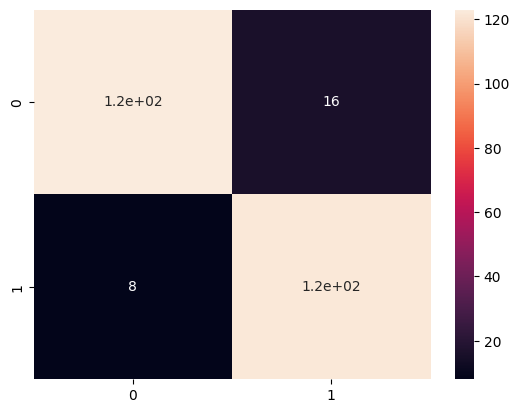

In [ ]:
# Importando a regressao logistica da sklearn
from sklearn.linear_model import LogisticRegression
import numpy as np

# Instanciando a reg. logistica
reglog = LogisticRegression()

#y1_train = np.ravel(y1_train)

reglog.fit(X_traini, y_traini)
y_reglog_predi = reglog.predict(X_testi)

reglog = LogisticRegression()
reglog.fit(X_traini, y_traini)

# Predicao
mostra_metricas(y_testi, y_reglog_predi)

In [ ]:
bol=[]
lul=[]
def bpred_reglog(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = reglog.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")
    bol.append("Esquerda")


  else:
    #print("Direita")
    bol.append("Direita")

def lpred_reglog(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = reglog.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")

    lul.append("Esquerda")

  else:
    #print("Direita")

    lul.append("Direita")

bol.clear()
for i in range(0,len(dfb['full_text'])):
    bpred_reglog(dfb['full_text'][i])

print('Bolsonaro:',bol.count('Direita')/len(bol))

lul.clear()
for i in range(0,len(dfl['full_text'])):
    lpred_reglog(dfl['full_text'][i])
print('Lula:',lul.count('Esquerda')/len(lul))

Bolsonaro: 0.8015896379158081
Lula: 0.2633513802553305


## **Arvore de decisão**

### Treinado com Dataset de Ideologias

              precision    recall  f1-score   support

           1       0.86      0.91      0.89       139
           2       0.90      0.85      0.87       130

    accuracy                           0.88       269
   macro avg       0.88      0.88      0.88       269
weighted avg       0.88      0.88      0.88       269

Acurácia:  0.8810408921933085

AUROC: 0.8799114554510239

F1-Score: 0.8808164161324011

Matriz de confusão:


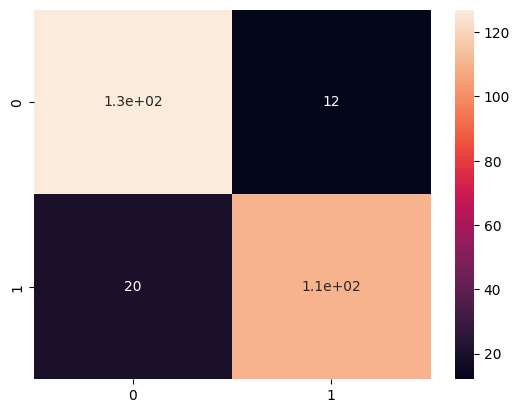

In [ ]:
# Criar uma instância do modelo de Árvore de Decisão
modeldt = DecisionTreeClassifier(max_depth=5000)

# Treinar o modelo utilizando o conjunto de treinamento
modeldt.fit(X_traini, y_traini)

# Fazer previsões no conjunto de teste
y_predi = modeldt.predict(X_testi)

# Avaliar o desempenho do modelo
report = classification_report(y_testi, y_predi)
print(report)
mostra_metricas(y_testi, y_predi)

In [ ]:
bol=[]
lul=[]
def b_dc(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = modeldt.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")
    bol.append("Esquerda")


  else:
    #print("Direita")
    bol.append("Direita")

def l_dc(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = modeldt.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")

    lul.append("Esquerda")

  else:
    #print("Direita")

    lul.append("Direita")

bol.clear()
for i in range(0,len(dfb['full_text'])):
    b_dc(dfb['full_text'][i])

print('Bolsonaro:',bol.count('Direita')/len(bol))

lul.clear()
for i in range(0,len(dfl['full_text'])):
    l_dc(dfl['full_text'][i])
print('Lula:',lul.count('Esquerda')/len(lul))

Bolsonaro: 0.8972622902561084
Lula: 0.11837444021121583


## **Support Vector Machine**

### Treinado com Dataset de Ideologias

Acurácia: 0.9033457249070632
Acurácia:  0.9033457249070632

AUROC: 0.9029883785279469

F1-Score: 0.9033162897734525

Matriz de confusão:


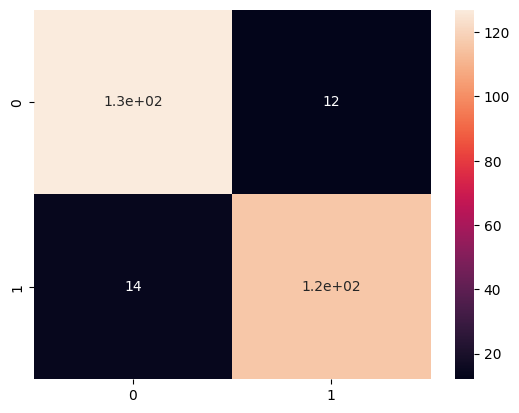

In [ ]:
modelsvm = SVC(kernel='linear')  # Escolha o kernel desejado (linear, polynomial, rbf, etc.)
modelsvm.fit(X_traini, y_traini)

y_predi = modelsvm.predict(X_testi)
accuracy = accuracy_score(y_testi, y_predi)
print("Acurácia:", accuracy)
mostra_metricas(y_testi, y_predi)

In [ ]:
def nova_predicaobsvm(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = modelsvm.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")
    bol.append("Esquerda")

  else:
    #print("Direita")
    bol.append("Direita")

def nova_predicaolsvm(texto):

  texto_vetorizado = tfidf_vect.transform([texto])
  pred = modelsvm.predict(texto_vetorizado)

  if pred == 1:
    #print("Esquerda")

    lul.append("Esquerda")

  else:
    #print("Direita")

    lul.append("Direita")

bol.clear()
for i in range(0,len(dfb['full_text'])):
    nova_predicaobsvm(dfb['full_text'][i])
print('Bolsonaro:',bol.count('Direita')/len(bol))


lul.clear()
for i in range(0,len(dfl['full_text'])):
    nova_predicaolsvm(dfl['full_text'][i])
print('Lula:',lul.count('Esquerda')/len(lul))

Bolsonaro: 0.7222549308213129
Lula: 0.3436267629169173


# Conclusão

Com base nas palavras mais frequentes nos tweets de Bolsonaro e Lula, é importante notar que existem diferenças em relação às temáticas abordadas por cada um. Essas diferenças podem indicar algumas características e ênfases ideológicas de ambos os políticos, mas é crucial lembrar que essa análise baseada apenas nas palavras mais mencionadas não fornece uma visão completa de suas ideologias políticas.

------------------------------------------------------------------------------

No caso de Lula, as palavras mais frequentes envolvem termos como "país", "presidente", "povo", "PT" e "direito". Essas palavras sugerem uma ênfase em questões relacionadas ao país, ao povo, ao exercício do poder, às políticas governamentais e aos direitos sociais, associando-se a uma ideologia mais alinhada com a esquerda política.

------------------------------------------------------------------------------

Já Bolsonaro, por sua vez, tem palavras mais frequentes como "poder", "PT", "economia", "militar" e "família". Essas palavras sugerem uma ênfase em temas relacionados ao exercício do poder, à oposição ao PT, à economia, ao papel das forças militares e aos valores familiares, indicando uma tendência mais alinhada com a direita política.

------------------------------------------------------------------------------

No entanto, é importante destacar que essas conclusões são simplificações e não podem abranger toda a complexidade das ideologias e políticas de Lula e Bolsonaro. Ambos os políticos possuem históricos políticos, discursos e ações que vão além das palavras mais mencionadas em seus tweets. Para uma compreensão mais completa, é necessário considerar uma variedade de fontes e informações sobre suas posições políticas, programas de governo e posturas em relação a diferentes questões políticas e sociais.


É bom notar que a tarefa de identificar a ideologia com base em palavras é complexa e desafiadora. A classificação precisa da ideologia requer um conjunto de dados bem construído, com rótulos precisos e representativos de diferentes tendências ideológicas. Além disso, é necessário levar em consideração o contexto e as nuances das declarações políticas, uma vez que a ideologia não pode ser completamente capturada apenas pelas palavras mais frequentes de tweets.

Os modelos de Machine Learning que foram utilizados apresentaram baixa precisão na identificação da ideologia com base nas palavras mais frequentes, pode ser necessário revisar e melhorar o conjunto de dados utilizado. É fundamental ter um conjunto de dados abrangente e equilibrado, que abarque uma variedade de fontes e discursos políticos, representando diferentes perspectivas ideológicas de forma justa.

No entanto, mesmo com um conjunto de dados aprimorado, é importante reconhecer que a identificação precisa da ideologia é um desafio complexo. A ideologia política é multifacetada e pode ser influenciada por uma variedade de fatores, como a experiência pessoal, a cultura, as políticas específicas e as mudanças no tempo. Portanto, a análise ideológica não pode ser reduzida apenas à contagem de palavras mais frequentes.

A inclusão de uma classe neutra é importante na identificação de ideologia com base em palavras. Nem todos os tweets possuem uma expressão ideológica clara, e a falta dessa classe pode afetar a acurácia do modelo. Portanto, é recomendado incorporar uma classe neutra no conjunto de dados para capturar adequadamente as declarações políticas que não apresentam associação ideológica definida. Isso permite uma classificação mais precisa das diferentes ideologias representadas.

Além dos modelos de Machine Learning, é valioso complementar a análise com métodos qualitativos, como a análise de discursos e o estudo aprofundado das ações políticas, para obter uma compreensão mais completa das ideologias dos políticos em questão.